# **Projet Machine Learning**

L’objectif est de prédire la variable Value-co2-emissions à partir des autres variables.

## **Partie I : Analyse exploratoire des données**

1) Commencez par une analyse descriptive unidimensionnelle des données.

#### Chargement des données

In [467]:
import pandas as pd
import numpy as np
# Lecture des données
## Charger les données ou les lire directement en précisant le chemin
path="./global-data-on-sustainable-energy.csv"
data=pd.read_csv(path,sep=",",header=0)
# Vérification du contenu
data.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [468]:
data.describe()

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
count,3649.000000,3639.000000,3480.000000,2718.000000,1.560000e+03,3455.000000,3628.000000,3523.000000,3628.000000,3607.000000,3649.000000,3442.000000,3.221000e+03,1512.000000,3332.000000,3367.000000,3.648000e+03,3648.000000,3648.000000
mean,2010.038367,78.933702,63.255287,113.137498,9.422400e+07,32.638165,70.365003,13.450190,23.968010,36.801182,25743.981745,5.307345,1.598665e+05,11.986707,3.441610,13283.774348,6.332135e+05,18.246388,14.822695
std,6.054228,30.275541,39.043658,244.167256,2.981544e+08,29.894901,348.051866,73.006623,104.431085,34.314884,34773.221366,3.532020,7.736611e+05,14.994644,5.686720,19709.866716,1.585519e+06,24.159232,66.348148
min,2000.000000,1.252269,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,1.000000e+01,0.000000,-62.075920,111.927225,2.100000e+01,-40.900557,-175.198242
25%,2005.000000,59.800890,23.175000,3.540000,2.600000e+05,6.515000,0.290000,0.000000,0.040000,2.877847,3116.737300,3.170000,2.020000e+03,2.137095,1.383302,1337.813437,2.571300e+04,3.202778,-11.779889
50%,2010.000000,98.361570,83.150000,32.910000,5.665000e+06,23.300000,2.970000,0.000000,1.470000,27.865068,13120.570000,4.300000,1.050000e+04,6.290766,3.559855,4578.633208,1.176000e+05,17.189877,19.145136
75%,2015.000000,100.000000,100.000000,112.210000,5.534750e+07,55.245000,26.837500,0.000000,9.600000,64.403792,33892.780000,6.027500,6.058000e+04,16.841638,5.830099,15768.615365,5.131200e+05,38.969719,46.199616
max,2020.000000,100.000000,100.000000,3060.190000,5.202310e+09,96.040000,5184.130000,809.410000,2184.940000,100.000010,262585.700000,32.570000,1.070722e+07,86.836586,123.139555,123514.196700,9.984670e+06,64.963051,178.065032


In [469]:
# Renommage des colonnes du DataFrame df en français
data.columns = [
    'Pays',
    'Année', 
    'Accès à l\'électricité (% de la population)',
    'Accès à des combustibles propres pour la cuisson',
    'Capacité de génération d\'électricité renouvelable par habitant',
    'Flux financiers vers les pays en développement (US $)',
    'Part des énergies renouvelables dans la consommation finale totale d\'énergie (%)',
    'Électricité provenant des combustibles fossiles (TWh)',
    'Électricité provenant du nucléaire (TWh)',
    'Électricité provenant des renouvelables (TWh)',
    'Électricité à faible émission de carbone (% de l\'électricité)',
    'Consommation d\'énergie primaire par habitant (kWh/personne)',
    'Niveau d\'intensité énergétique de l\'énergie primaire (MJ/$2017 PPA GDP)',
    'Émissions de CO2 (kt par pays)',
    'Renouvelables (% équivalent de l\'énergie primaire)',
    'Croissance du PIB',
    'PIB par habitant',
    'Densité (P/Km2)',
    'Superficie (Km2)',
    'Latitude',
    'Longitude'
]

# Affichage des 5 premières lignes de la base de données avec les noms de colonnes renommés
data.head()

,Pays,Année,Accès à l'électricité (% de la population),Accès à des combustibles propres pour la cuisson,Capacité de génération d'électricité renouvelable par habitant,Flux financiers vers les pays en développement (US $),Part des énergies renouvelables dans la consommation finale totale d'énergie (%),Électricité provenant des combustibles fossiles (TWh),Électricité provenant du nucléaire (TWh),Électricité provenant des renouvelables (TWh),...,Consommation d'énergie primaire par habitant (kWh/personne),Niveau d'intensité énergétique de l'énergie primaire (MJ/$2017 PPA GDP),Émissions de CO2 (kt par pays),Renouvelables (% équivalent de l'énergie primaire),Croissance du PIB,PIB par habitant,Densité (P/Km2),Superficie (Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [470]:
print(data.dtypes)

Pays                                                                                 object
Année                                                                                 int64
Accès à l'électricité (% de la population)                                          float64
Accès à des combustibles propres pour la cuisson                                    float64
Capacité de génération d'électricité renouvelable par habitant                      float64
Flux financiers vers les pays en développement (US $)                               float64
Part des énergies renouvelables dans la consommation finale totale d'énergie (%)    float64
Électricité provenant des combustibles fossiles (TWh)                               float64
Électricité provenant du nucléaire (TWh)                                            float64
Électricité provenant des renouvelables (TWh)                                       float64
Électricité à faible émission de carbone (% de l'électricité)                   

#### Distribution des variables

In [471]:
def plot_distribution(df,k):

    '''
      cette fonction permet de représenter les distributions des variables de df
      maximum 12 à la fois. Il faut faire varier k pour voir l'ensemble des distributions
      de X1new

      pré: df est un dataframe.
           k est un entier
    '''

    #plt.style.use('seaborn')
    fig, axs = plt.subplots(nrows=4,ncols=3, figsize = (15, 15))
    fig.suptitle('Distribution des variables',fontsize = 10)
    i=0
    j=0
    for col in df.columns[k:k+12]:
        axs[i,j].hist(df[col], edgecolor = 'white', align = 'mid', bins = 20)
        axs[i,j].set_xlabel(col)
        j=j+1
        if j==3:
            j=0
            i=i+1
        if i==4:
            break

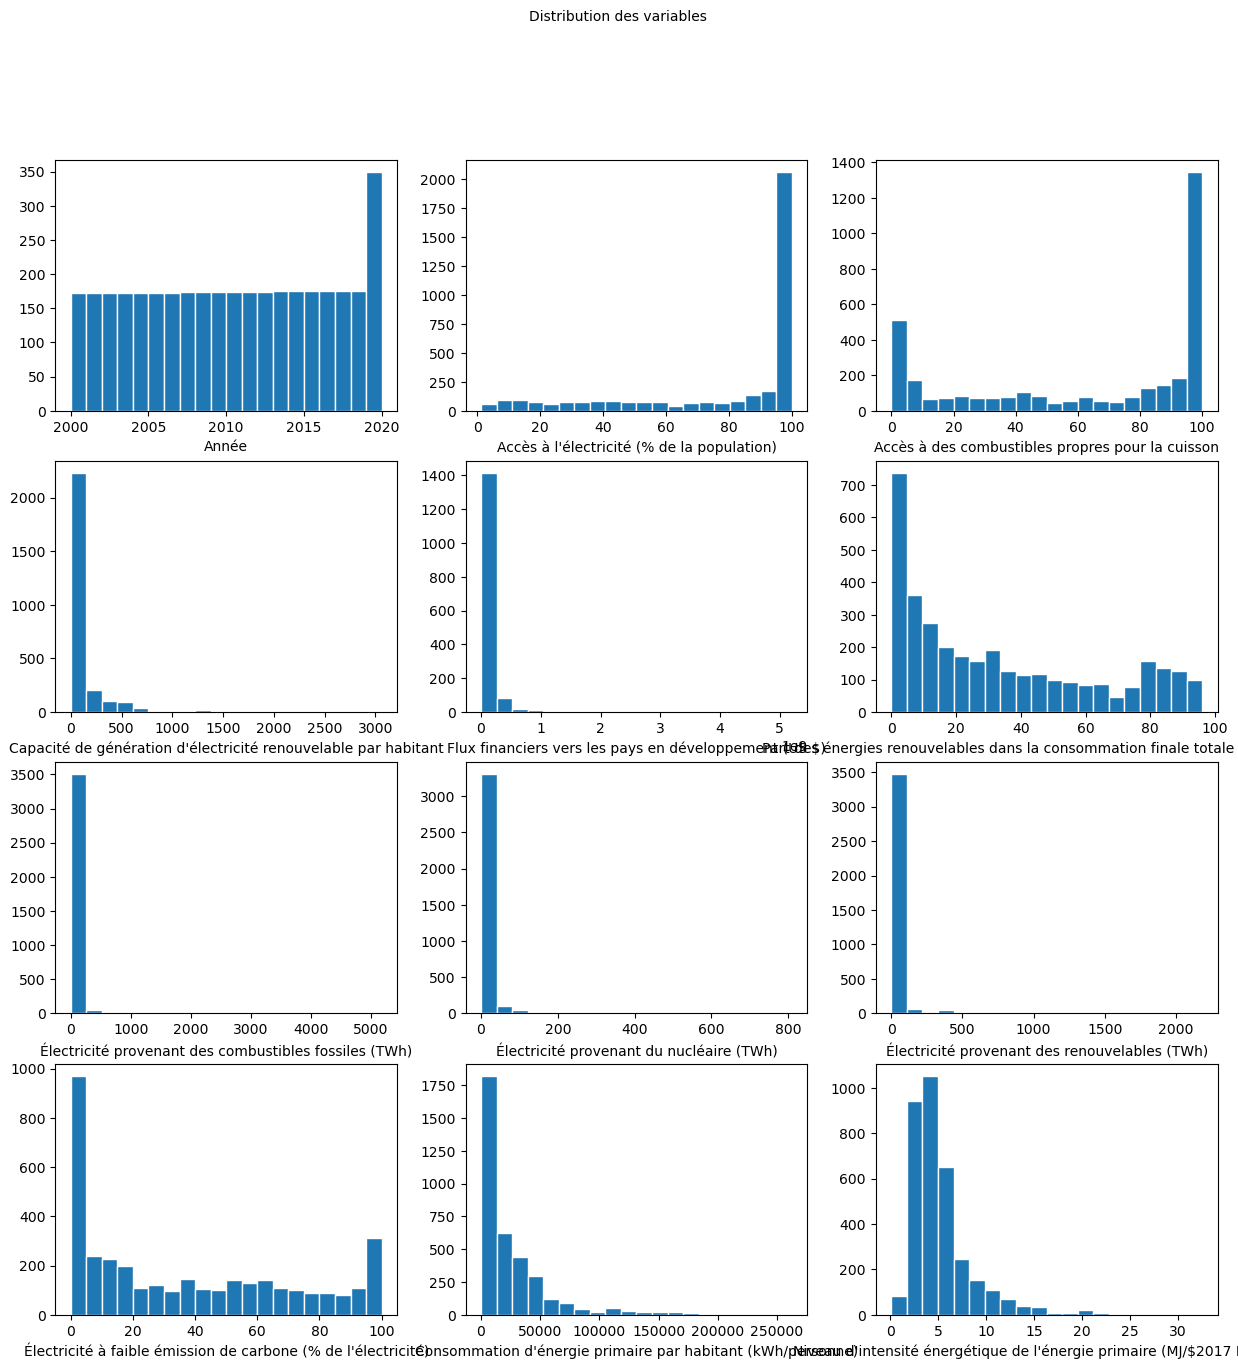

In [472]:
plot_distribution(data,1)  #

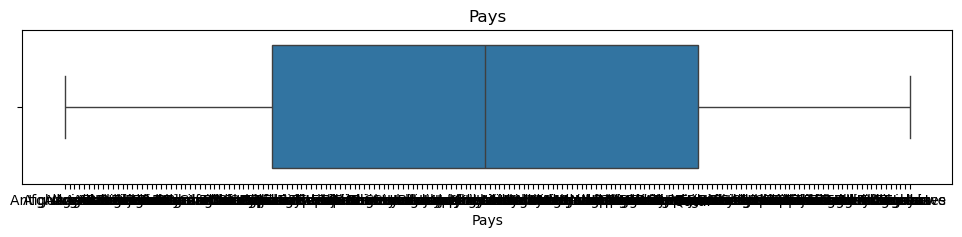

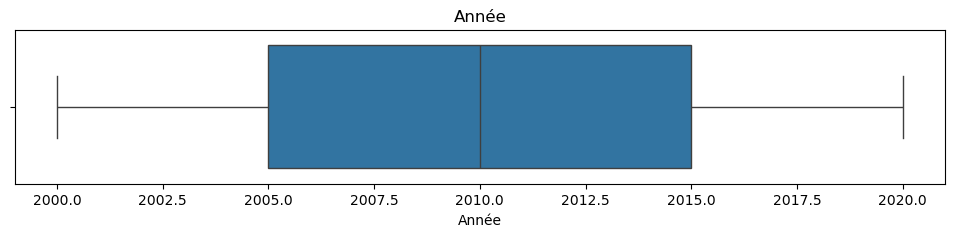

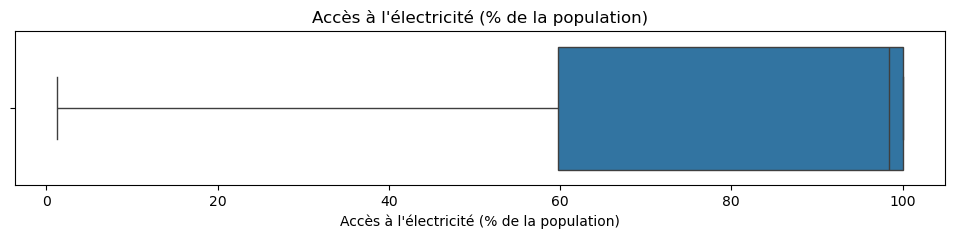

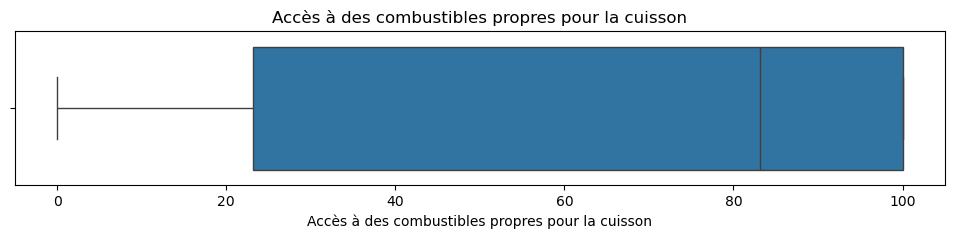

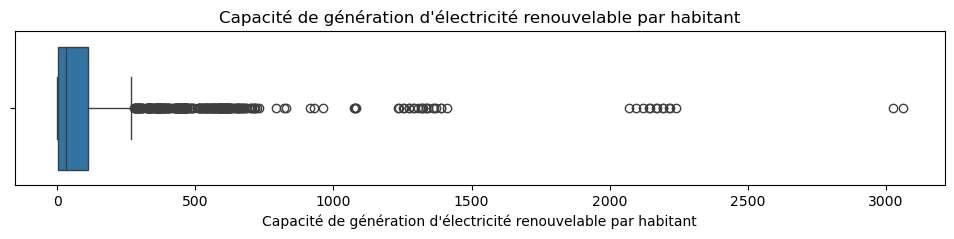

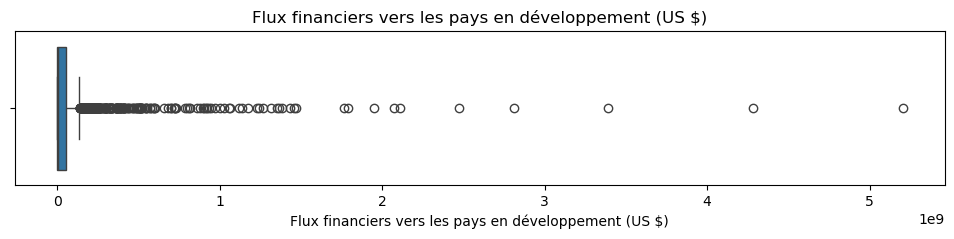

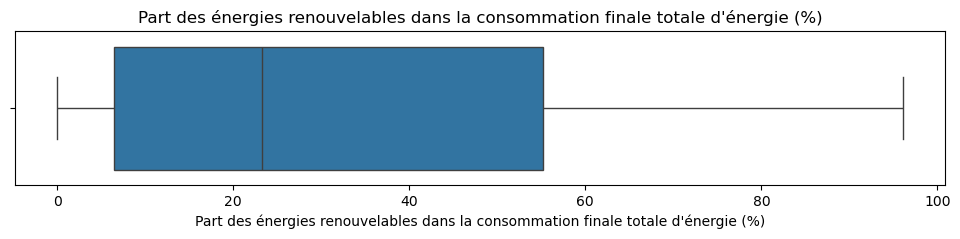

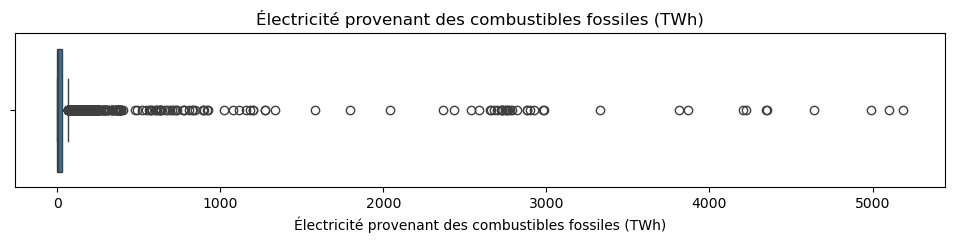

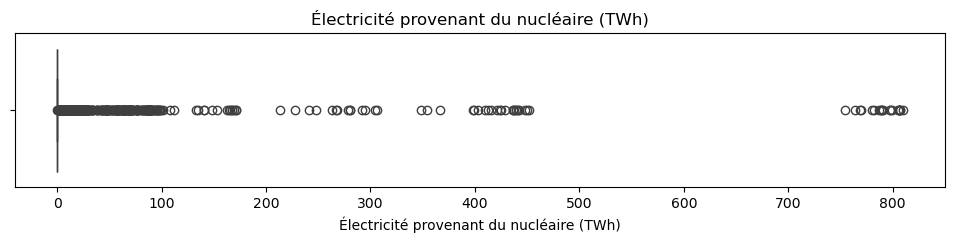

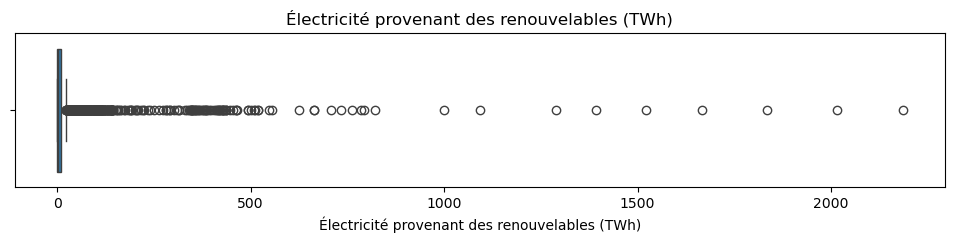

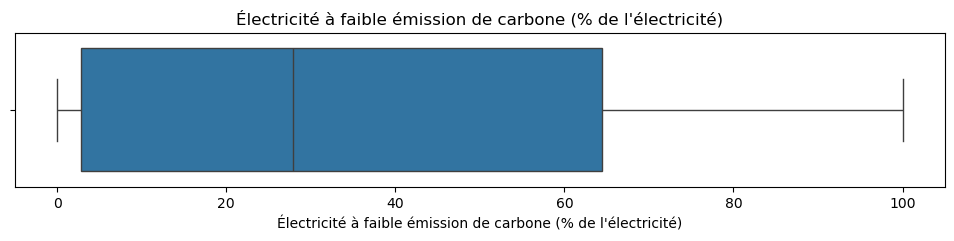

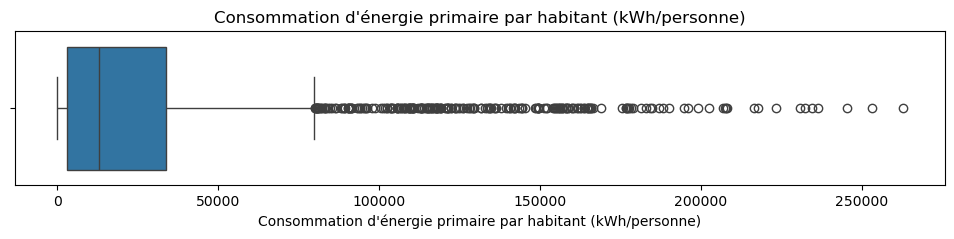

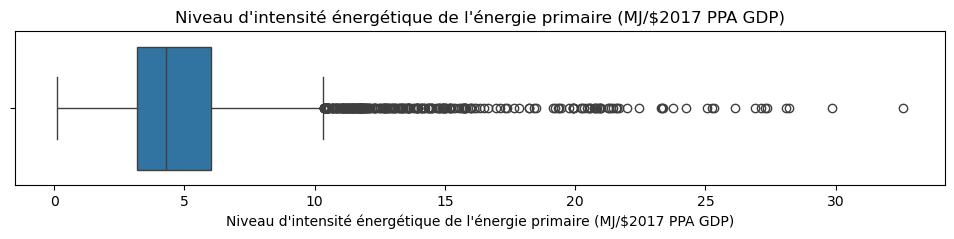

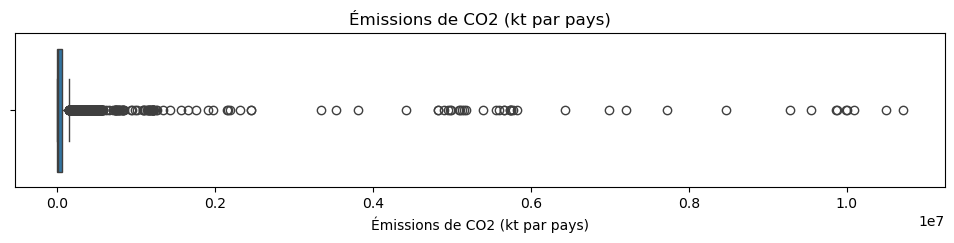

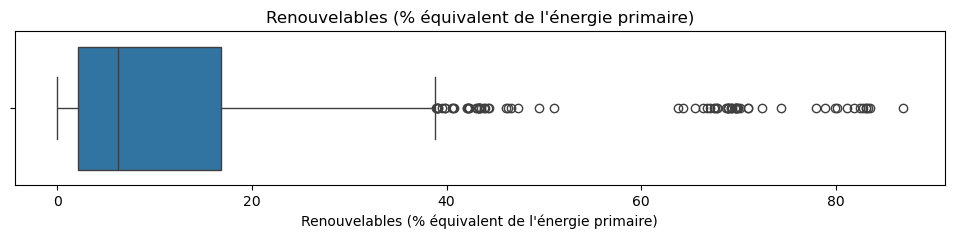

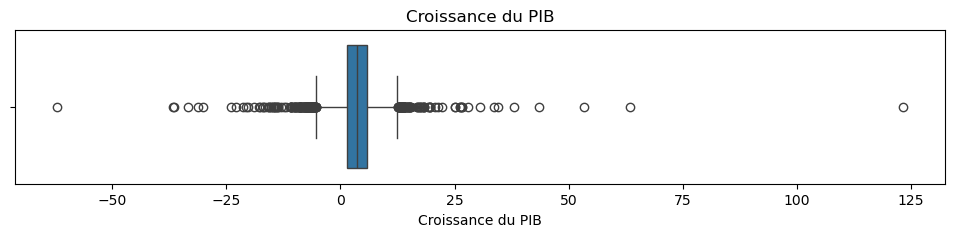

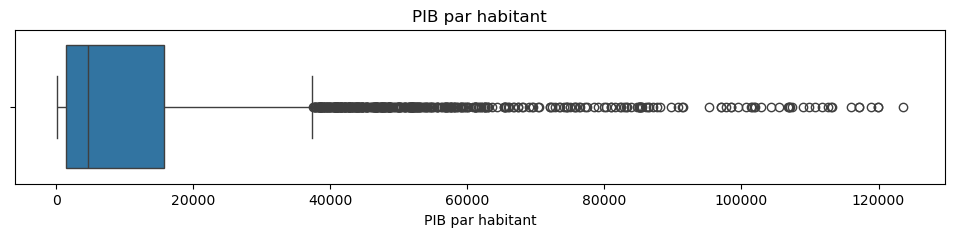

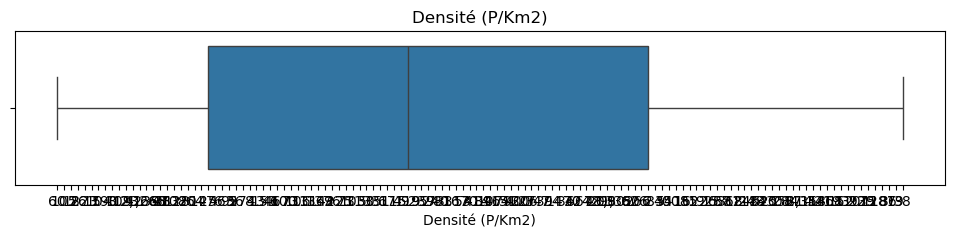

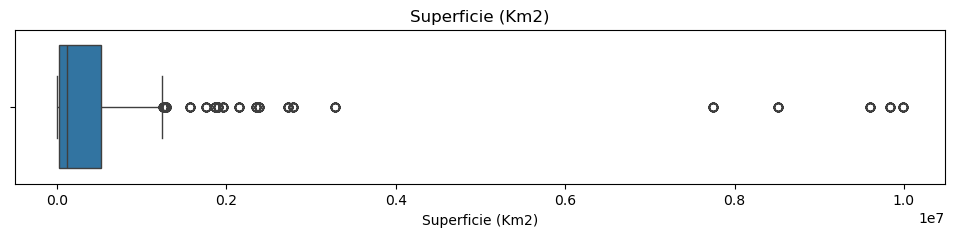

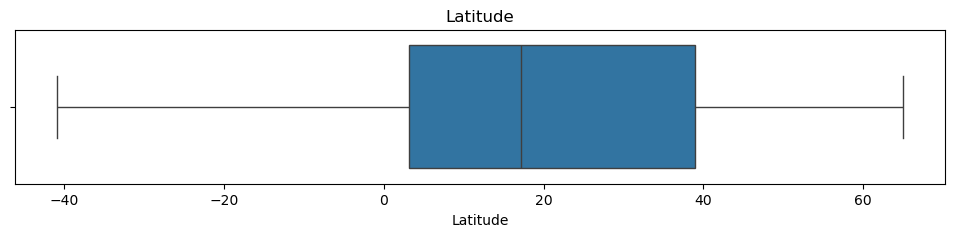

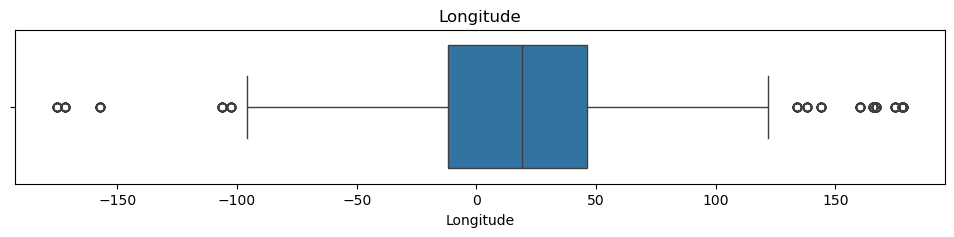

In [473]:
import seaborn as sns

# Tracé des boxplots pour chaque variable
for column in data.columns:
    fig, ax = plt.subplots(figsize=(12, 2))
    #fig, axs = plt.subplots(nrows=4,ncols=3, figsize = (15, 15))
    sns.boxplot(x=data[column], ax=ax)
    plt.title(column)
    plt.show()

#### Application dela fonction logarithme sur la cible
Quand on regarde de plus prêt la distribution de la valeur cible, on remarque qu'elle est trés mal distribuée, il y a beaucoup de valeur aberrantes 

Si on fait le log de cette variable, on obtient une meilleure distribution même si il reste quelques valeurs aberrantes :

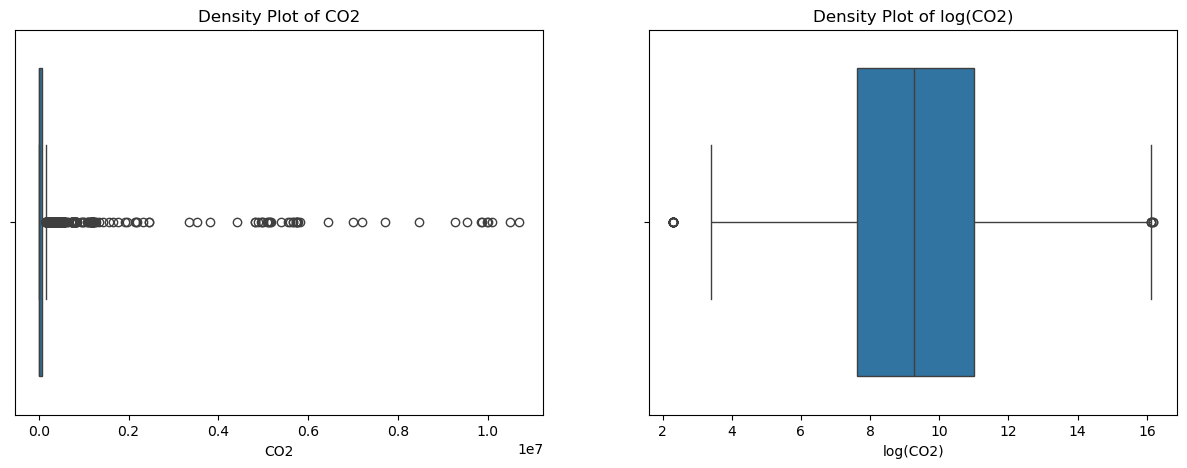

In [474]:

import matplotlib.pyplot as plt
import seaborn as sns

# Création de la figure avec deux sous-graphiques
plt.figure(figsize=(15, 5))

# Graphique de densité de la variable originale
plt.subplot(1, 2, 1)
plt.xlabel('CO2')
sns.boxplot(x=data['Émissions de CO2 (kt par pays)'])
plt.title('Density Plot of CO2')

# Graphique de densité du logarithme de la variable
plt.subplot(1, 2, 2)
plt.xlabel('log(CO2)')
sns.boxplot(x=np.log(data['Émissions de CO2 (kt par pays)']))
plt.title('Density Plot of log(CO2)')

# Afficher les graphiques
plt.show()

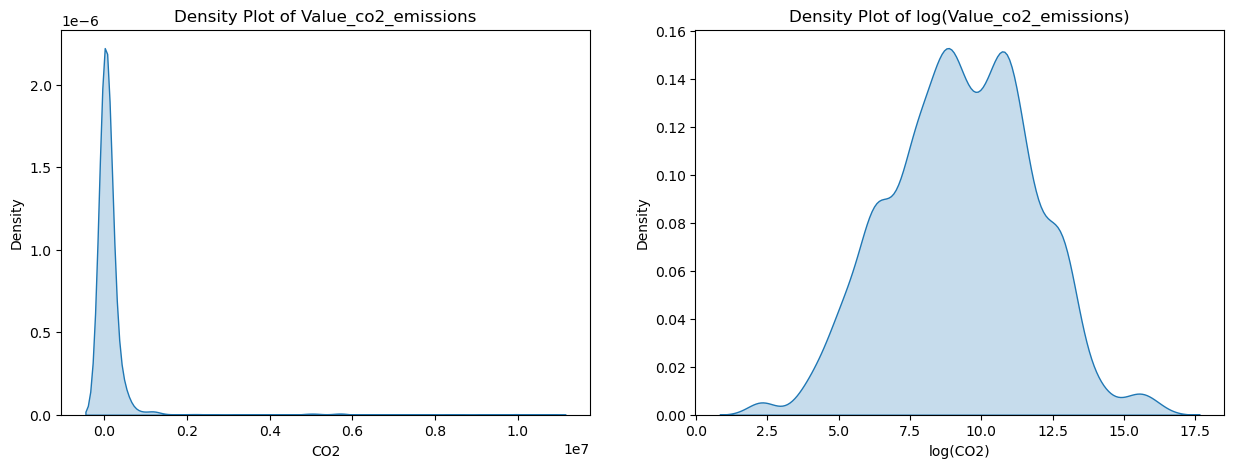

In [475]:
import matplotlib.pyplot as plt
import seaborn as sns

# Création de la figure avec deux sous-graphiques
plt.figure(figsize=(15, 5))

# Graphique de densité de la variable originale
plt.subplot(1, 2, 1)
plt.xlabel('CO2')
sns.kdeplot(data['Émissions de CO2 (kt par pays)'], fill=True)
plt.title('Density Plot of Value_co2_emissions')

# Graphique de densité du logarithme de la variable
plt.subplot(1, 2, 2)
plt.xlabel('log(CO2)')
sns.kdeplot(np.log(data['Émissions de CO2 (kt par pays)']), fill=True)
plt.title('Density Plot of log(Value_co2_emissions)')

# Afficher les graphiques
plt.show()

#### Transformation des variables :

2) Des transformations des variables quantitatives vous semblent-t-elles pertinentes ?
N.B. Curieusement, la variable Density (P/Km2) n’est pas considérée comme une variable numérique, convertissez-là en une variable numérique. Convertissez la variable Year en une variable qualitative.

- transformation de la densité en valeur numérique

In [445]:
all_columns = data.columns.tolist()

title_Density = all_columns[17]
data[title_Density] = pd.to_numeric(data[title_Density], errors='coerce')

- Transformation de l'année en valeur quantitative

In [446]:
#Si FR : 
data['Année'] = data['Année'].astype(str)
#Si ENG :
#data['Year'] = data['Year'].astype(str)

- Visualisation des nouveaux types de données

In [447]:
print(data.dtypes)

Pays                                                                                 object
Année                                                                                object
Accès à l'électricité (% de la population)                                          float64
Accès à des combustibles propres pour la cuisson                                    float64
Capacité de génération d'électricité renouvelable par habitant                      float64
Flux financiers vers les pays en développement (US $)                               float64
Part des énergies renouvelables dans la consommation finale totale d'énergie (%)    float64
Électricité provenant des combustibles fossiles (TWh)                               float64
Électricité provenant du nucléaire (TWh)                                            float64
Électricité provenant des renouvelables (TWh)                                       float64
Électricité à faible émission de carbone (% de l'électricité)                   

### Visualisation

3) Visualisez la grande hétérogénéité des émissions de CO2 entre les pays. 

- Quels sont les 5 pays les plus émetteurs de CO2 ?

In [448]:
# Groupement par 'Entity' et calcul de la somme totale des émissions de CO2
#Si FR : 
total_co2_emissions = data.groupby('Pays')['Émissions de CO2 (kt par pays)'].sum()
#Si ENG :
#total_co2_emissions = data.groupby('Entity')['Value_co2_emissions_kt_by_country'].sum()
# Tri des pays par émissions totales de CO2
top_emitters = total_co2_emissions.sort_values(ascending=False).head(5)
print(top_emitters)

Pays
China            1.527328e+08
United States    1.065908e+08
India            3.267958e+07
Japan            2.367469e+07
Germany          1.547289e+07
Name: Émissions de CO2 (kt par pays), dtype: float64


In [449]:
import plotly.express as px

# Create a bar plot using Plotly Express
fig = px.bar(
    top_emitters,  # DataFrame containing the data
    x=top_emitters.index,  # x-values: 'Country' categories
    y=top_emitters.values,  # y-values: maximum 'CO2' emissions
    title='Top 5 Pays by Maximum CO2 Emissions',  
    labels={'Pays': 'Pays', 'CO2': 'CO2 Emissions'},  
    template='plotly_white' 
)

# Set the height of the plot
fig.update_layout(height=650)

# Display the plot
fig.show()

#### Valeurs manquantes :

4) Déterminer le taux de valeurs manquantes pour chaque variable.

- Déterminer le taux de valeurs manquantes pour chaque variable.

In [450]:
def missing(df):
    print (round((df.isna().sum() * 100/ len(df)),2).sort_values(ascending=False))

print(missing(data))

Renouvelables (% équivalent de l'énergie primaire)                                  58.56
Flux financiers vers les pays en développement (US $)                               57.25
Capacité de génération d'électricité renouvelable par habitant                      25.51
Émissions de CO2 (kt par pays)                                                      11.73
Croissance du PIB                                                                    8.69
PIB par habitant                                                                     7.73
Niveau d'intensité énergétique de l'énergie primaire (MJ/$2017 PPA GDP)              5.67
Part des énergies renouvelables dans la consommation finale totale d'énergie (%)     5.32
Accès à des combustibles propres pour la cuisson                                     4.63
Électricité provenant du nucléaire (TWh)                                             3.45
Densité (P/Km2)                                                                      2.90
Électricit

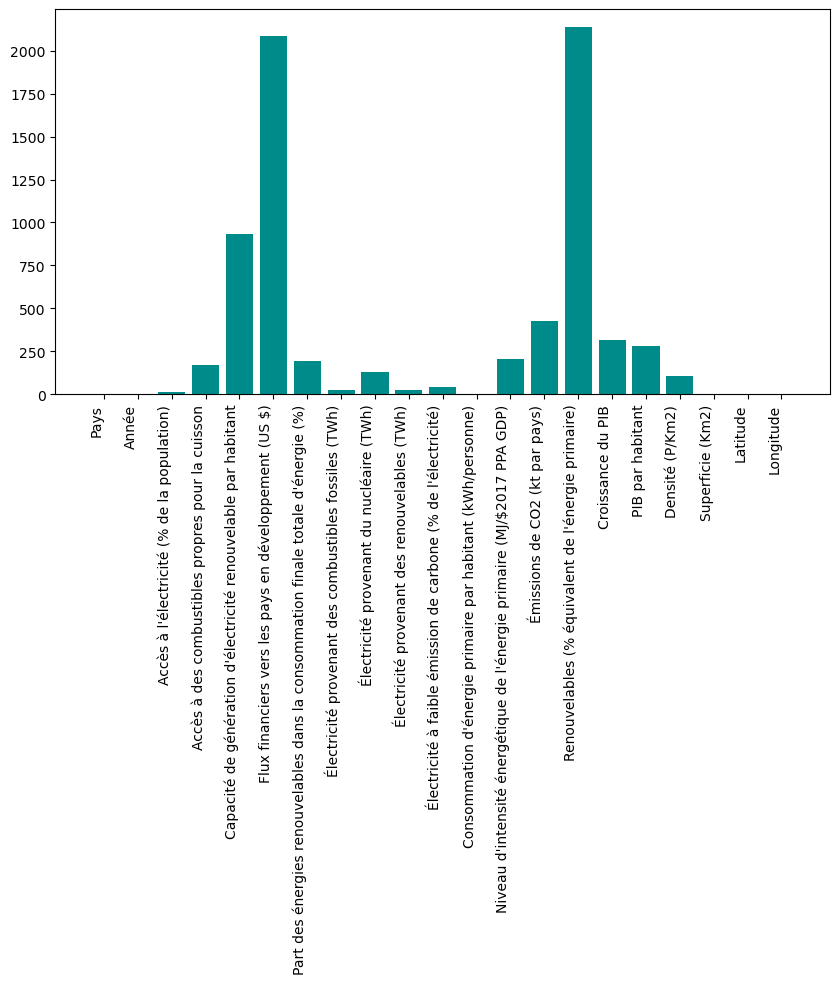

In [451]:
# Calculating the count of missing values in each column
missing_values = data.isnull().sum()
plt.figure(figsize=(10, 5))
plt.bar(x=missing_values.index, height=missing_values.values, color='darkcyan')
plt.xticks(rotation=90, ha="right") 

plt.show()

 Les éléments avec le plus grand taux de valeurs manquantes sont Renewables (% equivalent primary energy), Financial flows to developing countries (US $),Renewable-electricity-generating-capacity-per-capita  ,Value_co2_emissions_kt_by_country et Energy intensity level of primary energy (MJ/$2017 PPP GDP).

 2. On propose de supprimer pour ce projet les variables comportant un taux de données manquantes très im- portant : Renewable-electricity-generating-capacity-per-capita, Financial flows to developing countries (US Dollars) et Renewables (% equivalent primary energy).

In [452]:
# Suppression des colonnes spécifiées si dataframe en ENG
# columns_to_drop = ['Renewable-electricity-generating-capacity-per-capita', 
#                    'Financial flows to developing countries (US $)', 
#                    'Renewables (% equivalent primary energy)']
#Si en FR :
# Suppression des colonnes spécifiées
columns_to_drop = ['Capacité de génération d\'électricité renouvelable par habitant',
    'Flux financiers vers les pays en développement (US $)',
    'Renouvelables (% équivalent de l\'énergie primaire)']

data.drop(columns=columns_to_drop, inplace=True)

In [453]:
data.shape

(3649, 18)

In [455]:
data.dropna(inplace=True)

In [456]:
print(missing(data))

Pays                                                                                0.0
Année                                                                               0.0
Latitude                                                                            0.0
Superficie (Km2)                                                                    0.0
Densité (P/Km2)                                                                     0.0
PIB par habitant                                                                    0.0
Croissance du PIB                                                                   0.0
Émissions de CO2 (kt par pays)                                                      0.0
Niveau d'intensité énergétique de l'énergie primaire (MJ/$2017 PPA GDP)             0.0
Consommation d'énergie primaire par habitant (kWh/personne)                         0.0
Électricité à faible émission de carbone (% de l'électricité)                       0.0
Électricité provenant des renouv

## Analyse descriptive multidimensionnelle

5) Poursuivez avec une analyse descriptive multidimensionnelle. Utilisez des techniques de visualisation : par exemple scatterplot, correlation plot ... Analysez les dépendances entre les variables quantitatives.

In [457]:
print(data.dtypes)

Pays                                                                                 object
Année                                                                                object
Accès à l'électricité (% de la population)                                          float64
Accès à des combustibles propres pour la cuisson                                    float64
Part des énergies renouvelables dans la consommation finale totale d'énergie (%)    float64
Électricité provenant des combustibles fossiles (TWh)                               float64
Électricité provenant du nucléaire (TWh)                                            float64
Électricité provenant des renouvelables (TWh)                                       float64
Électricité à faible émission de carbone (% de l'électricité)                       float64
Consommation d'énergie primaire par habitant (kWh/personne)                         float64
Niveau d'intensité énergétique de l'énergie primaire (MJ/$2017 PPA GDP)         

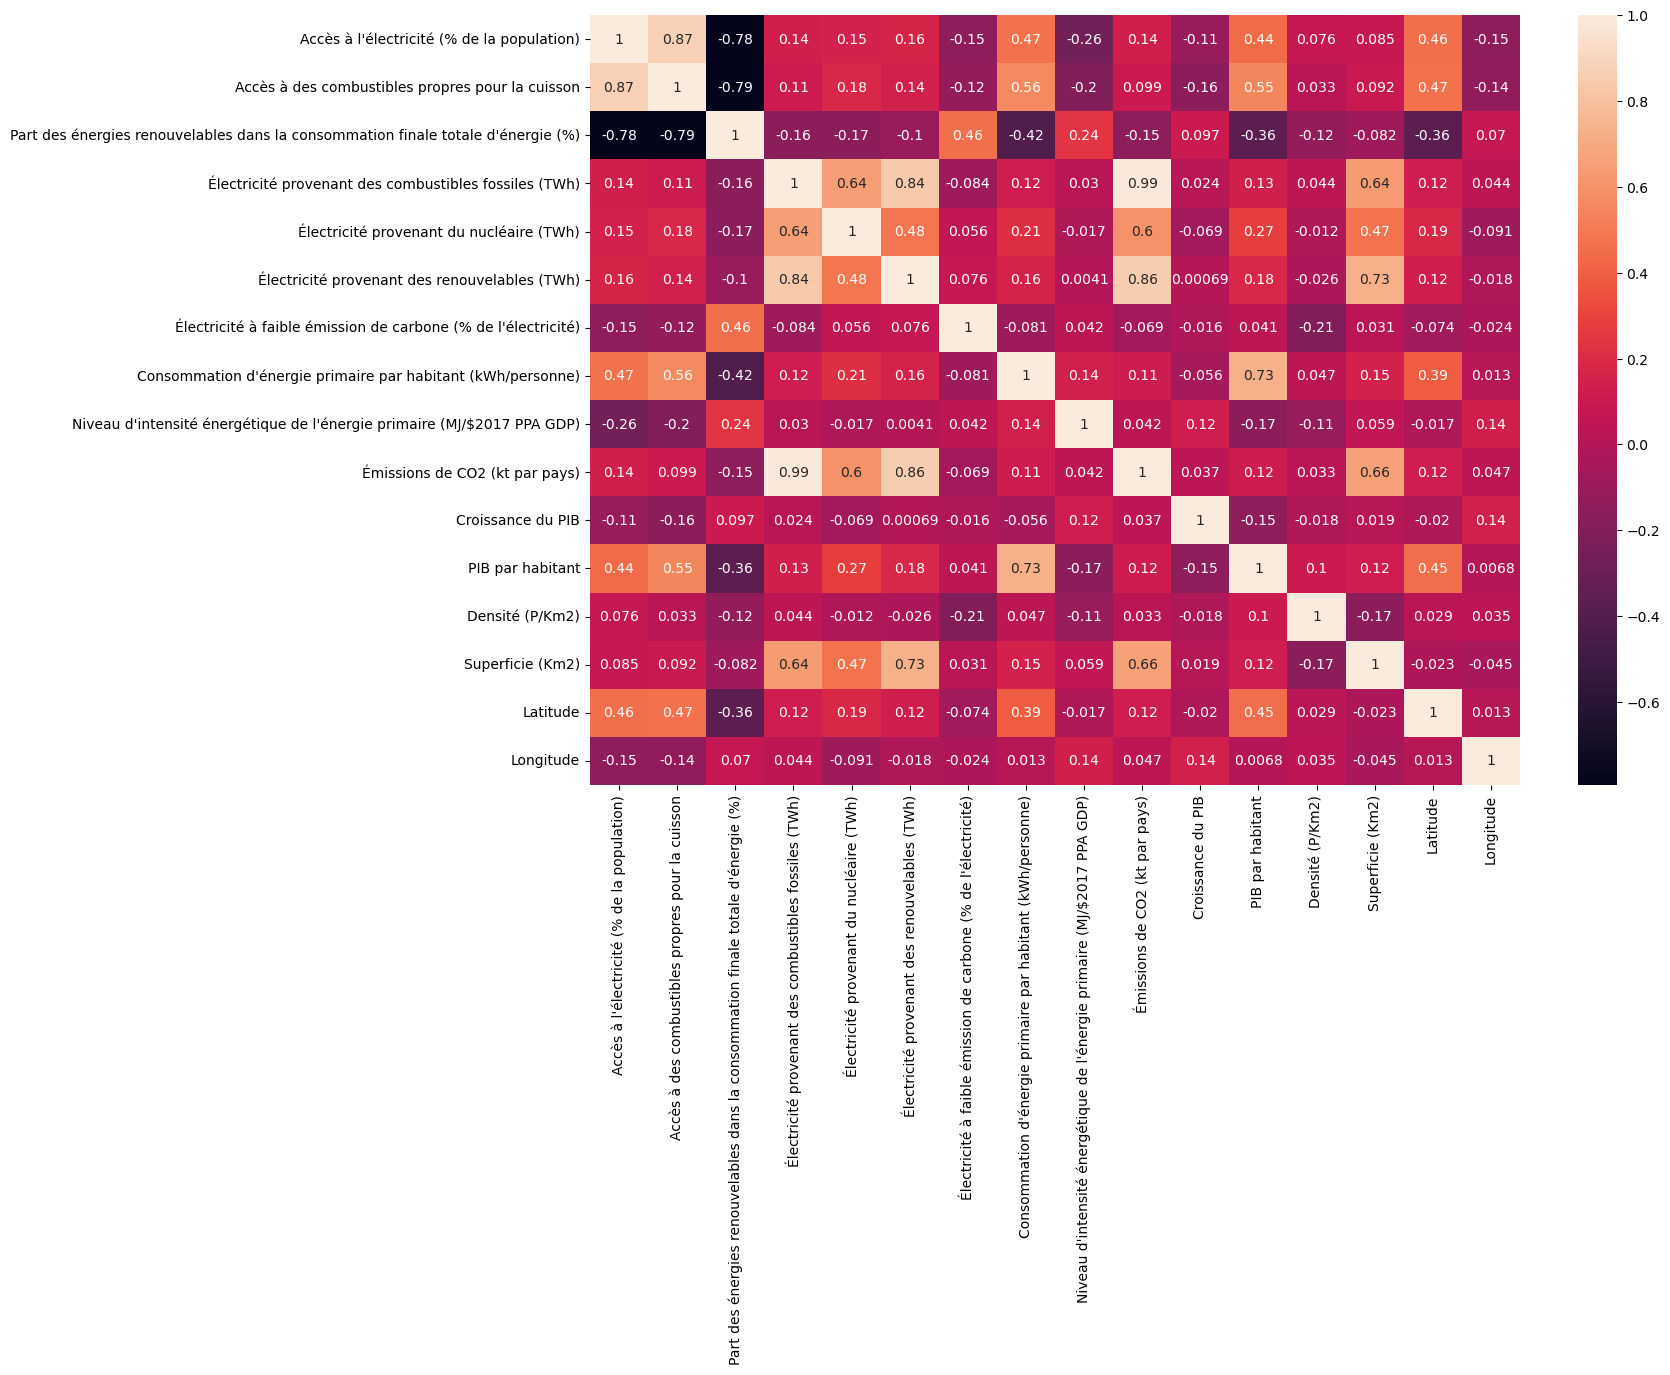

In [458]:
# scatter plot matrix des variables quantitatives
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True)
plt.show()
plt.show()

La relation croissante entre les value CO2 emission kt by country (émissions de CO2 par pays en kilotonnes) et electricity from fossil fuels (TWh) (électricité produite à partir de combustibles fossiles en térawattheures), cela suggère une corrélation positive entre ces deux variables. Cela signifie que, généralement, plus un pays produit d'électricité à partir de combustibles fossiles, plus ses émissions de CO2 tendent à être élevées.
(Ce qui paraît logique)

In [459]:
# Extraction des variables ayant une corrélation supérieure à 0.6 avec la variable d'intérêt
corr_threshold = 0.6
corr_vars = corr_matrix[abs(corr_matrix["Émissions de CO2 (kt par pays)"]) > corr_threshold].index.tolist()

# Affichage des variables ayant une corrélation supérieure à 0.6 avec la variable d'intérêt
print("Variables ayant une corrélation supérieure à 0.6 avec la variable d'intérêt (Émissions de CO2 (kt par pays)) :\n")
for vars in corr_vars:
    print(vars)

print("\n")
# Extraction des variables ayant une corrélation inférieure à -0.6 avec la variable d'intérêt
corr_threshold = -0.6
corr_vars = corr_matrix[abs(corr_matrix["Émissions de CO2 (kt par pays)"]) < corr_threshold].index.tolist()

# Affichage des variables ayant une corrélation supérieure à 0.6 avec la variable d'intérêt
print("Variables ayant une corrélation inférieure à -0.6 avec la variable d'intérêt (Émissions de CO2 (kt par pays)) :\n")
print(corr_vars)

Variables ayant une corrélation supérieure à 0.6 avec la variable d'intérêt (Émissions de CO2 (kt par pays)) :

Électricité provenant des combustibles fossiles (TWh)
Électricité provenant des renouvelables (TWh)
Émissions de CO2 (kt par pays)
Superficie (Km2)


Variables ayant une corrélation inférieure à -0.6 avec la variable d'intérêt (Émissions de CO2 (kt par pays)) :

[]


In [460]:
# Extraction des couples de variables ayant une corrélation supérieure à 0.8
corr_threshold = 0.8
corr_pairs = {}

for col in corr_matrix.columns:
    corr_pairs[col] = []
    corr_values = corr_matrix[abs(corr_matrix[col]) > corr_threshold][col].index.tolist()
    for pair in corr_values:
        if pair != col:
            corr_pairs[col].append(pair)

# Affichage des couples de variables ayant une corrélation supérieure à 0.8
print("Couples de variables ayant une corrélation supérieure à 0.8 :\n")
for col, pairs in corr_pairs.items():
    if len(pairs) > 0:
        for pair in pairs:
            print(col, "-", pair)

Couples de variables ayant une corrélation supérieure à 0.8 :

Accès à l'électricité (% de la population) - Accès à des combustibles propres pour la cuisson
Accès à des combustibles propres pour la cuisson - Accès à l'électricité (% de la population)
Électricité provenant des combustibles fossiles (TWh) - Électricité provenant des renouvelables (TWh)
Électricité provenant des combustibles fossiles (TWh) - Émissions de CO2 (kt par pays)
Électricité provenant des renouvelables (TWh) - Électricité provenant des combustibles fossiles (TWh)
Électricité provenant des renouvelables (TWh) - Émissions de CO2 (kt par pays)
Émissions de CO2 (kt par pays) - Électricité provenant des combustibles fossiles (TWh)
Émissions de CO2 (kt par pays) - Électricité provenant des renouvelables (TWh)


## Analyse en composantes principales

6) Réalisez une analyse en composantes principales des variables quantitatives et interprétez les résultats.

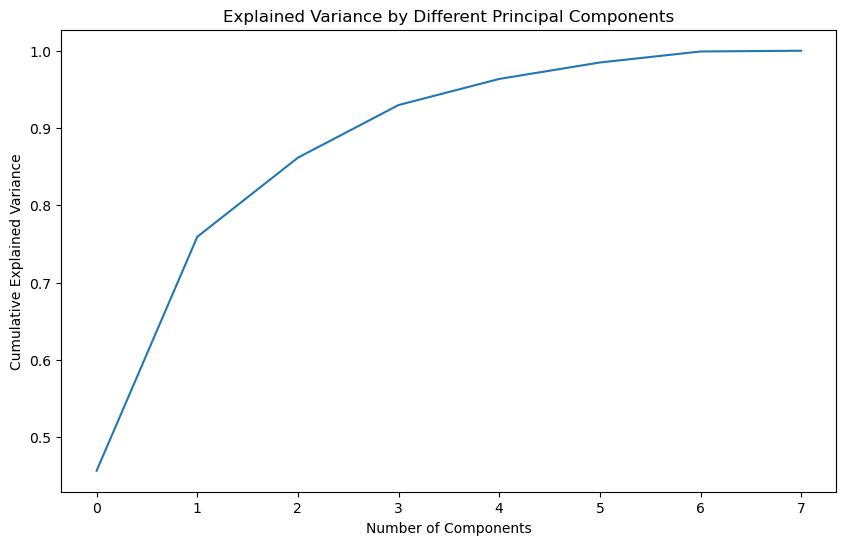

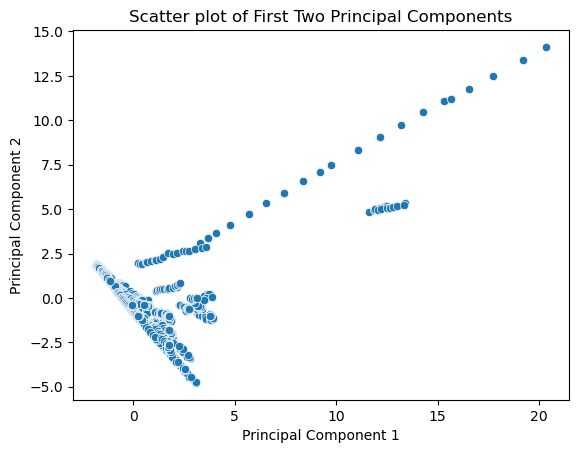

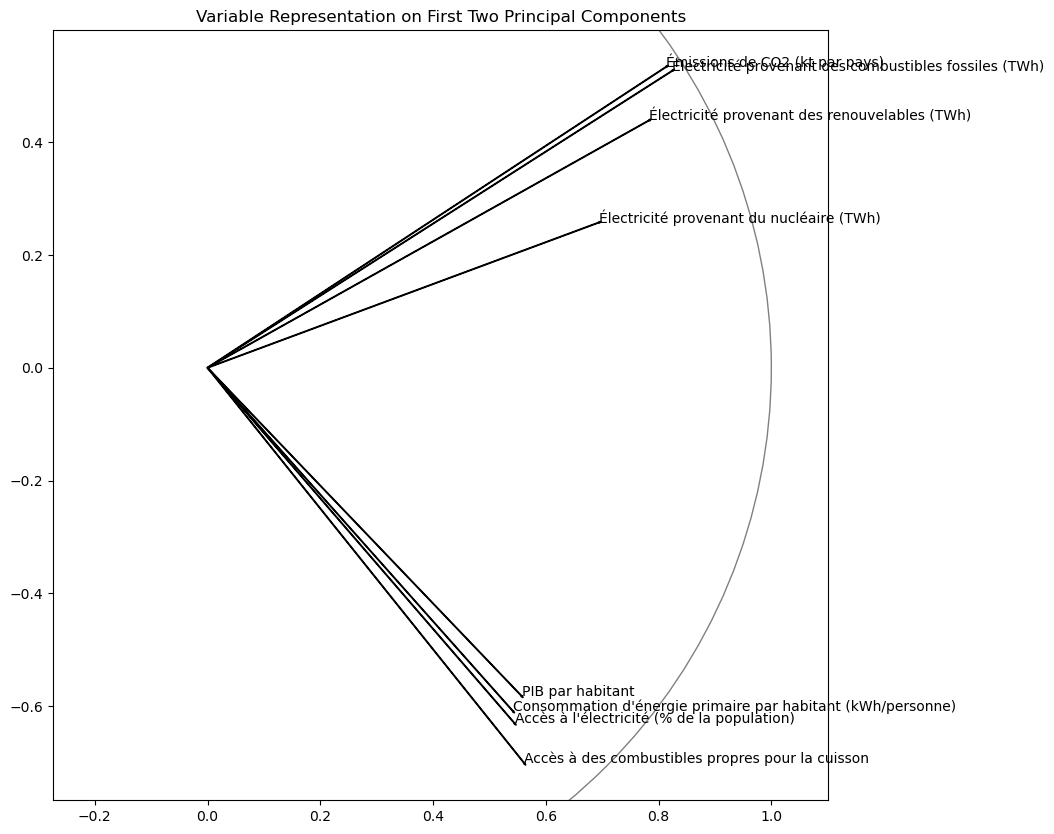

In [461]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Sélection des colonnes pour l'ACP
selected_columns = [
    'Accès à l\'électricité (% de la population)',
    'Accès à des combustibles propres pour la cuisson',
    'Électricité provenant des combustibles fossiles (TWh)',
    'Électricité provenant du nucléaire (TWh)',
    'Électricité provenant des renouvelables (TWh)',
    'Émissions de CO2 (kt par pays)',
    'PIB par habitant',
    'Consommation d\'énergie primaire par habitant (kWh/personne)',
]



# Préparation des données : élimination des valeurs manquantes et normalisation
data_for_pca = data[selected_columns].dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_pca)


# Application de l'ACP
pca = PCA()
pca_results = pca.fit_transform(scaled_data)

# Variance expliquée par chaque composante principale
explained_variance = pca.explained_variance_ratio_

# Création d'un DataFrame pour les résultats de l'ACP
pca_df = pd.DataFrame(data=pca_results, columns=[f'PC{i+1}' for i in range(len(selected_columns))])

# Visualisation de la variance expliquée
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Different Principal Components')
plt.show()

# Affichage des deux premières composantes principales
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter plot of First Two Principal Components')
plt.show()

# Affichage des coordonnées des variables sur les deux premières composantes principales
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
coord1 = pca.components_[0] * np.sqrt(pca.explained_variance_[0])
coord2 = pca.components_[1] * np.sqrt(pca.explained_variance_[1])

for i, j, nom in zip(coord1, coord2, selected_columns):
    plt.text(i, j, nom)
    plt.arrow(0, 0, i, j, color='black')

plt.axis('equal')
plt.title('Variable Representation on First Two Principal Components')
c = plt.Circle((0, 0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()


## Dépendance entre variable Year et variable à prédire

7) Visualisez la possible dépendance entre la variable Year et la variable à prédire.

In [462]:
import plotly.express as px

# Calculate the maximum 'CO2' emissions for each 'Year'
CO2_By_Year = data.groupby('Année')['Émissions de CO2 (kt par pays)'].max().reset_index()

# line plot
fig_CO2_By_Year = px.line(
    CO2_By_Year,
    x='Année',
    y='Émissions de CO2 (kt par pays)',
    labels={'Year': 'Year', 'Value_co2_emissions_kt_by_country': 'Max CO2 Emissions (kt)'},
    title='Maximum CO2 Emissions by Year',
    height=500,  
    line_shape='linear',  
    line_dash_sequence=['solid'],  
    markers=True,  
    template='plotly_white' 
)

fig_CO2_By_Year.update_layout(
    xaxis_title_font=dict(size=14),
    yaxis_title_font=dict(size=14),
    title_font=dict(size=18)
)

fig_CO2_By_Year.show()

In [463]:
import scipy.stats as stats

# Test de corrélation de Kendall entre les années et les émissions de CO2
kendall_corr, kendall_pvalue = stats.kendalltau(data['Année'], data['Émissions de CO2 (kt par pays)'])

print("Test de corrélation de Kendall :")
print("Coefficient de corrélation de Kendall :", kendall_corr)
print("Valeur p associée au test de corrélation de Kendall :", kendall_pvalue)

Test de corrélation de Kendall :
Coefficient de corrélation de Kendall : 0.03260173260133664
Valeur p associée au test de corrélation de Kendall : 0.012100639532388572


## **Partie II : Modélisation** 

Nous considérons maintenant le problème de la prédiction la variable Value-co2-emissions à partir des autres variables du point de vue de l’apprentissage automatique, c’est-à-dire en nous concentrant sur les performances du modèle. L’objectif est de déterminer les meilleures performances que nous pouvons attendre, et les modèles qui les atteignent. Voici quelques questions pour vous guider.

In [207]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

`Transformation pipeline` :

In [354]:
# Importation des données
path="./global-data-on-sustainable-energy.csv"
data=pd.read_csv(path,sep=",",header=0)

data.head()

# Renommage des colonnes du DataFrame df en français (Optionnel)
data.columns = [
    'Pays',
    'Année', 
    'Accès à l\'électricité (% de la population)',
    'Accès à des combustibles propres pour la cuisson',
    'Capacité de génération d\'électricité renouvelable par habitant',
    'Flux financiers vers les pays en développement (US $)',
    'Part des énergies renouvelables dans la consommation finale totale d\'énergie (%)',
    'Électricité provenant des combustibles fossiles (TWh)',
    'Électricité provenant du nucléaire (TWh)',
    'Électricité provenant des renouvelables (TWh)',
    'Électricité à faible émission de carbone (% de l\'électricité)',
    'Consommation d\'énergie primaire par habitant (kWh/personne)',
    'Niveau d\'intensité énergétique de l\'énergie primaire (MJ/$2017 PPA GDP)',
    'Émissions de CO2 (kt par pays)',
    'Renouvelables (% équivalent de l\'énergie primaire)',
    'Croissance du PIB',
    'PIB par habitant',
    'Densité (P/Km2)',
    'Superficie (Km2)',
    'Latitude',
    'Longitude'
]

all_columns = data.columns.tolist()

title_Density = all_columns[17]
data[title_Density] = pd.to_numeric(data[title_Density], errors='coerce')

#Transformation valeur quantitative en catégorique
#Si FR : 
data['Année'] = data['Année'].astype(str)
#Si ENG :
#data['Year'] = data['Year'].astype(str)


# Suppression des colonnes spécifiées si dataframe en ENG
# columns_to_drop = ['Renewable-electricity-generating-capacity-per-capita', 
#                    'Financial flows to developing countries (US $)', 
#                    'Renewables (% equivalent primary energy)']
#Si en FR :
# Suppression des colonnes spécifiées
columns_to_drop = ['Capacité de génération d\'électricité renouvelable par habitant',
    'Flux financiers vers les pays en développement (US $)',
    'Renouvelables (% équivalent de l\'énergie primaire)']

data.drop(columns=columns_to_drop, inplace=True)

# Clean Dataset

1) Dans un premier temps, vous allez créer un jeu de données comportant seulement les observations qui n’ont pas de valeur manquante. Il reste 2768 observations.

In [356]:
# Creating a dataset with only the observations that have no missing values
data_cleaned = data.dropna()

# Checking the number of remaining observations to match the requirement
remaining_observations = len(data_cleaned)

remaining_observations

2768

Vérification de la propreté

In [210]:
# Calcul du pourcentage de valeurs manquantes pour chaque colonne
missing_values_percentage = data_cleaned.isnull().mean() * 100

# Affichage du pourcentage de valeurs manquantes
print(missing_values_percentage)

Pays                                                                                0.0
Année                                                                               0.0
Accès à l'électricité (% de la population)                                          0.0
Accès à des combustibles propres pour la cuisson                                    0.0
Part des énergies renouvelables dans la consommation finale totale d'énergie (%)    0.0
Électricité provenant des combustibles fossiles (TWh)                               0.0
Électricité provenant du nucléaire (TWh)                                            0.0
Électricité provenant des renouvelables (TWh)                                       0.0
Électricité à faible émission de carbone (% de l'électricité)                       0.0
Consommation d'énergie primaire par habitant (kWh/personne)                         0.0
Niveau d'intensité énergétique de l'énergie primaire (MJ/$2017 PPA GDP)             0.0
Émissions de CO2 (kt par pays)  

# Division en Train et en Test

2) Divisez ce jeu de données en un échantillon d’apprentissage et un échantillon test. Vous prendrez un
pourcentage de 20% pour l’échantillon test. Pourquoi cette étape est-elle nécessaire lorsque nous nous
concentrons sur les performances des algorithmes ?

Mais avant de séparer le dataset en deux, il faut transformer les variables categorielles en quantitatives grace à l'encodage one hot vector 

##### **Etape 1** : Encodage (One Hot Encoder)

In [297]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# instantiate the one hot encoder
encoder = OneHotEncoder(sparse=False, drop = "first")
#ou encoder = OneHotEncoder(sparse=False)

# Sélection des colonnes catégorielles
categorical_vars = ["Pays", "Année"]

# Application de l'encodage One-Hot sur les variables catégorielles
encoded_vars = encoder.fit_transform(data_cleaned[categorical_vars])

# Création d'un DataFrame pour les variables encodées
encoded_vars_df = pd.DataFrame(encoded_vars, columns=encoder.get_feature_names_out(categorical_vars))

# concatenate the new dataframe back to the original input variables dataframe
df_cleaned_new = pd.concat([data_cleaned.reset_index(drop=True), encoded_vars_df.reset_index(drop=True)], axis = 1)

# drop the original input 2 and input 3 as it is not needed anymore
df_cleaned_new.drop(categorical_vars, axis = 1, inplace = True)


/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [288]:
df_cleaned_new.dtypes

Accès à l'électricité (% de la population)                                          float64
Accès à des combustibles propres pour la cuisson                                    float64
Part des énergies renouvelables dans la consommation finale totale d'énergie (%)    float64
Électricité provenant des combustibles fossiles (TWh)                               float64
Électricité provenant du nucléaire (TWh)                                            float64
                                                                                     ...   
Année_2015                                                                          float64
Année_2016                                                                          float64
Année_2017                                                                          float64
Année_2018                                                                          float64
Année_2019                                                                      

In [283]:
df_cleaned_new.head()

,Accès à l'électricité (% de la population),Accès à des combustibles propres pour la cuisson,Part des énergies renouvelables dans la consommation finale totale d'énergie (%),Électricité provenant des combustibles fossiles (TWh),Électricité provenant du nucléaire (TWh),Électricité provenant des renouvelables (TWh),Électricité à faible émission de carbone (% de l'électricité),Consommation d'énergie primaire par habitant (kWh/personne),Niveau d'intensité énergétique de l'énergie primaire (MJ/$2017 PPA GDP),Émissions de CO2 (kt par pays),...,Année_2010,Année_2011,Année_2012,Année_2013,Année_2014,Année_2015,Année_2016,Année_2017,Année_2018,Année_2019
0,14.738506,9.50,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20.064968,10.90,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,25.390894,12.20,33.88,0.34,0.0,0.59,63.440857,252.06912,1.41,1549.999952,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30.718690,13.85,31.89,0.20,0.0,0.64,76.190475,304.42090,1.50,1759.999990,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,36.051010,15.30,28.78,0.20,0.0,0.75,78.947370,354.27990,1.53,1769.999981,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### **Etape 2** : Division échantillon `train` et `test`

In [300]:
# # Diviser les données en ensembles d'apprentissage et de test
train, test = train_test_split(df_cleaned_new, test_size=0.2, random_state=2024)

# Séparation des variables prédictives et de la variable cible
X_train = train.drop("Émissions de CO2 (kt par pays)", axis=1)
y_train = train["Émissions de CO2 (kt par pays)"]

X_test = test.drop("Émissions de CO2 (kt par pays)", axis=1)
y_test = test["Émissions de CO2 (kt par pays)"]

# # Nous travaillons avec le log ytrain

# target = df_cleaned_new['Émissions de CO2 (kt par pays)']
# df_cleaned_new.drop(columns=['Émissions de CO2 (kt par pays)'], inplace=True)
# X_train, X_test, y_train, y_test = train_test_split(df_cleaned_new, target, test_size=0.2, random_state=2024, shuffle=True)
log_y_train = np.log(y_train)
log_y_test = np.log(y_test)

##### **Etape 3** : Stardardisation

"L'étape suivante est une étape de standardisation des données ou normalisation. Les variables sont divisées par leur écart-type. Ce n'est pas utile dans le cas d'un modèle linéaire élémentaire car la solution est identique mais indispensbale pour beaucoup d'autres méthodes non linéaires (SVM, réseaux de neurones, modèles avec pénalisation). Cette étape est donc concrètement systématiquement exécutée pour éviter des soucis."

In [301]:
from sklearn.preprocessing import StandardScaler  
# L'algorithme ds réseaux de neurones nécessite éventuellement une normalisation 
# des variables explicatives avec les commandes ci-dessous
# scaler = StandardScaler()  
# scaler.fit(X_train)  
# Xr_train = scaler.transform(X_train)  
# # Meme transformation sur le test
# Xr_test = scaler.transform(X_test)

# standardisation
scaler = StandardScaler()
scaler.fit(X_train)


df_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)

df_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

df_train_scaled.head()

,Accès à l'électricité (% de la population),Accès à des combustibles propres pour la cuisson,Part des énergies renouvelables dans la consommation finale totale d'énergie (%),Électricité provenant des combustibles fossiles (TWh),Électricité provenant du nucléaire (TWh),Électricité provenant des renouvelables (TWh),Électricité à faible émission de carbone (% de l'électricité),Consommation d'énergie primaire par habitant (kWh/personne),Niveau d'intensité énergétique de l'énergie primaire (MJ/$2017 PPA GDP),Croissance du PIB,...,Année_2010,Année_2011,Année_2012,Année_2013,Année_2014,Année_2015,Année_2016,Année_2017,Année_2018,Année_2019
0,0.710138,0.808360,0.345488,-0.053095,-0.018221,3.159472,1.382715,-0.254322,-0.444138,0.281251,...,-0.231914,-0.23083,-0.228651,-0.224242,-0.232993,-0.234068,-0.231914,-0.228651,-0.228651,-0.236208
1,0.756417,0.984464,-0.763567,0.750083,1.111264,1.192819,0.031436,0.623102,-0.645034,-0.330781,...,-0.231914,-0.23083,-0.228651,-0.224242,4.291975,-0.234068,-0.231914,-0.228651,-0.228651,-0.236208
2,0.487528,-0.998627,0.407625,-0.200375,-0.196016,-0.239654,0.404731,-0.533735,-0.372586,0.082300,...,-0.231914,-0.23083,-0.228651,-0.224242,-0.232993,-0.234068,-0.231914,-0.228651,-0.228651,-0.236208
3,0.725007,0.591419,-0.925794,0.417635,-0.045543,0.221968,-0.574065,-0.164452,-0.598250,-0.100873,...,-0.231914,-0.23083,-0.228651,-0.224242,-0.232993,4.272256,-0.231914,-0.228651,-0.228651,-0.236208
4,0.730834,0.858129,-0.599661,-0.196259,-0.196016,-0.236921,-0.652618,-0.312828,-0.697321,0.457616,...,-0.231914,-0.23083,-0.228651,-0.224242,-0.232993,-0.234068,-0.231914,-0.228651,-0.228651,-0.236208


# Modèle de régression linéaire

Comment comparez les performances d’un modèle de régression linéaire avec/sans sélection de variables avec/sans pénalisation ?

Dans un premier temps il faut faire une régression linéaire élémentaire pour avoir une solution de base.
Ensuite, nous pouvons créé une regression avec sélection de variable en focntion de la p-value

Nous pouvons tester la régression pénalisé, comme lasso, ridge, elastic-net.
A cela nous pouvons faire une sélection de variable.

Pour les regression pénalisé faire avec la standardisation

Etape 1 : Régression simple sans sélection de variables ni pénalisation
Etape 2 : Régression simple avec sélection de variable sans pénalisation
Etape 3 : Régression avec pénalisation lasso, ridge, elastic-net
Etape 4 : Régression pénalisée avec sélection de variable

##### **Etape 1** : Régression simple sans sélection de variables ni pénalisation

In [302]:
import statsmodels.api as sm

# Fit du modèle linéaire
lr_model_1 = sm.OLS(log_y_train, sm.add_constant(X_train)).fit()

# Obtention du tableau de résultats
results_table = lr_model_1.summary2().tables[1]
results_table

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,8.105981,0.069995,115.807509,0.000000e+00,7.968711,8.243250
Accès à l'électricité (% de la population),0.009045,0.000648,13.968846,2.030823e-42,0.007775,0.010315
Accès à des combustibles propres pour la cuisson,-0.003266,0.000926,-3.528119,4.277773e-04,-0.005082,-0.001451
Part des énergies renouvelables dans la consommation finale totale d'énergie (%),-0.029622,0.000899,-32.944458,3.069158e-191,-0.031385,-0.027859
Électricité provenant des combustibles fossiles (TWh),0.000200,0.000062,3.241195,1.209461e-03,0.000079,0.000320
...,...,...,...,...,...,...
Année_2015,0.264203,0.024398,10.828698,1.310900e-26,0.216354,0.312051
Année_2016,0.273177,0.024823,11.004888,2.098040e-27,0.224496,0.321859
Année_2017,0.299556,0.025326,11.827849,2.869036e-31,0.249888,0.349224
Année_2018,0.300827,0.025984,11.577286,4.567580e-30,0.249869,0.351786


In [303]:
lr_model_1.summary2().tables[0]

,0,1,2,3
0,Model:,OLS,Adj. R-squared:,0.996
1,Dependent Variable:,Émissions de CO2 (kt par pays),AIC:,-1797.3349
2,Date:,2024-02-27 22:37,BIC:,-810.7927
3,No. Observations:,2214,Log-Likelihood:,1071.7
4,Df Model:,172,F-statistic:,3068.
5,Df Residuals:,2041,Prob (F-statistic):,0.00
6,R-squared:,0.996,Scale:,0.024123


In [304]:
# Obtention des prédictions et des métriques d'évaluation
lr1_y_train_pred = lr_model_1.predict(sm.add_constant(X_train))
lr1_y_test_pred = lr_model_1.predict(sm.add_constant(X_test))
r2_train = r2_score(y_train, np.exp(lr1_y_train_pred))
r2_test = r2_score(y_test, np.exp(lr1_y_test_pred))
mse_train = mean_squared_error(y_train, np.exp(lr1_y_train_pred))
mse_test = mean_squared_error(y_test, np.exp(lr1_y_test_pred))
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Construction du tableau de résultats

df_metrics = pd.DataFrame({
    'Métrique': ['R2', 'MSE', 'RMSE'],
    'Train': [r2_train, mse_train, rmse_train],
    'Test': [r2_test, mse_test, rmse_test]
})

print(df_metrics)

  Métrique         Train          Test
0       R2  9.978521e-01  9.972484e-01
1      MSE  1.476124e+09  1.958645e+09
2     RMSE  3.842036e+04  4.425658e+04


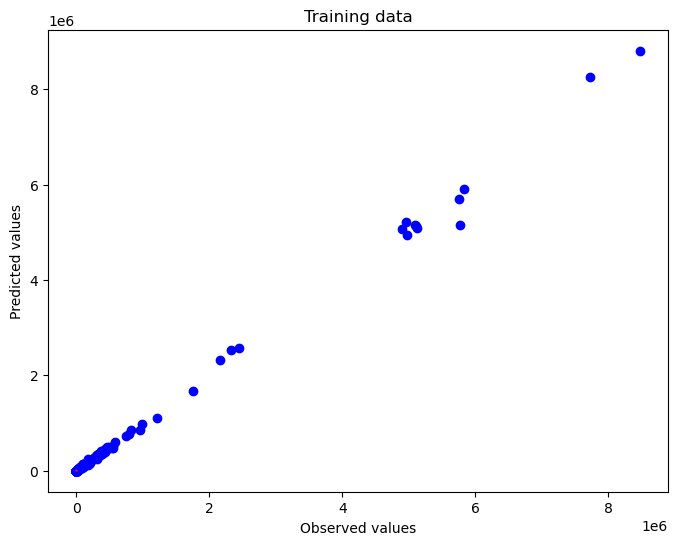

In [294]:
# Tracer les valeurs observées en fonction des valeurs prédites sur les données d'entraînement
plt.figure(figsize=(8, 6))
plt.scatter(y_test, np.exp(lr1_y_test_pred), color='blue')
plt.xlabel('Observed values')
plt.ylabel('Predicted values')
plt.title('Training data')
plt.plot(np.arange(0, 55, 5), np.arange(0, 55, 5), color='red')
plt.show()


In [295]:
import plotly.express as px

fig=px.scatter(x=np.exp(lr1_y_test_pred),y=y_test,labels={'x': 'Émissions de CO2 (kt par pays) prédite' , 'y': 'Émissions de CO2 (kt par pays) observée'})
fig.show()

##### **Etape 2** : Régression simple avec sélection de variable sans pénalisation

### Vérification de la corrélation de pearson

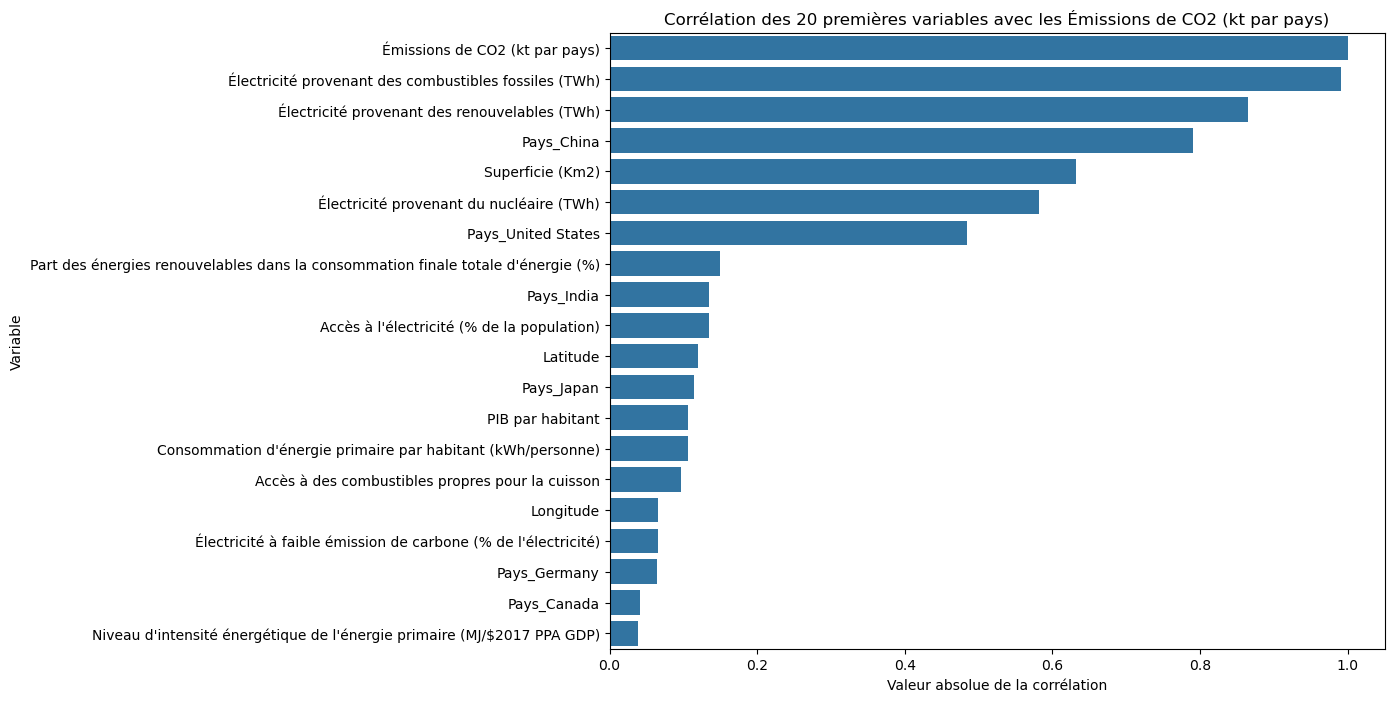

In [305]:
import matplotlib.pyplot as plt
import seaborn as sns

# Simulating 'train' DataFrame correlation computation and sorting
# This is a placeholder - replace 'train' with your actual DataFrame variable
correlations = abs(train.corr()["Émissions de CO2 (kt par pays)"]).sort_values(ascending=False)

# Selecting only the top 20 correlations
top_20_correlations = correlations.head(20)

# Plotting the top 20 correlations
plt.figure(figsize=(10, 8))
sns.barplot(x=top_20_correlations.values, y=top_20_correlations.index)
plt.xlabel("Valeur absolue de la corrélation")
plt.ylabel("Variable")
plt.title("Corrélation des 20 premières variables avec les Émissions de CO2 (kt par pays)")
plt.show()



Les plus corrélé c'esr electricité combustible fossile,
elec renouvelable, chine; superficie, nucléaire, USA, part des energies ...

### Sélection de Variables Basée sur les Statistiques

In [306]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype='float64')
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


selected_features = stepwise_selection(X_train, log_y_train)

print('Variables sélectionnées :')
print(len(selected_features))


Add  Accès à des combustibles propres pour la cuisson with p-value 2.58335e-163
Add  Superficie (Km2)               with p-value 1.84355e-130
Add  Latitude                       with p-value 9.79913e-51
Add  Longitude                      with p-value 2.11271e-33
Add  Pays_Nauru                     with p-value 6.12223e-35
Add  Pays_Dominica                  with p-value 1.96675e-24
Add  Pays_Nigeria                   with p-value 6.30392e-25
Add  Pays_Seychelles                with p-value 1.51735e-24
Add  Pays_Grenada                   with p-value 1.04876e-24
Add  Pays_Antigua and Barbuda       with p-value 7.54138e-25
Add  Pays_Bhutan                    with p-value 1.56974e-25
Add  Pays_Iceland                   with p-value 8.36005e-25
Add  Pays_South Africa              with p-value 3.52423e-26
Add  Pays_India                     with p-value 3.3183e-26
Add  Pays_Vanuatu                   with p-value 4.60978e-22
Add  Pays_Mexico                    with p-value 3.04423e-23
Add  

In [307]:
print(selected_features)

['Superficie (Km2)', 'Latitude', 'Pays_Nauru', 'Pays_Dominica', 'Pays_Nigeria', 'Pays_Seychelles', 'Pays_Grenada', 'Pays_Antigua and Barbuda', 'Pays_Bhutan', 'Pays_Iceland', 'Pays_South Africa', 'Pays_India', 'Pays_Vanuatu', 'Pays_Mexico', 'Pays_Pakistan', 'Pays_Belize', 'Pays_Barbados', 'Pays_Latvia', 'Pays_Tonga', 'Pays_Kiribati', 'Pays_Sao Tome and Principe', 'Pays_Germany', 'Pays_Japan', 'Pays_Thailand', 'Pays_Philippines', 'Pays_Suriname', 'Pays_Comoros', 'Pays_Central African Republic', 'Pays_Italy', 'Pays_Armenia', 'Pays_Solomon Islands', 'Pays_Cyprus', 'Pays_Mauritius', "Part des énergies renouvelables dans la consommation finale totale d'énergie (%)", 'Pays_Samoa', "Accès à l'électricité (% de la population)", 'Pays_Guyana', 'Pays_United Kingdom', 'Pays_Montenegro', 'Pays_France', 'Pays_Spain', 'Pays_Poland', 'Pays_Angola', 'Pays_Kenya', 'Pays_Georgia', 'Pays_Ukraine', 'Pays_Djibouti', 'Pays_Zimbabwe', 'Pays_North Macedonia', 'Pays_Luxembourg', 'Pays_Mongolia', 'Pays_Ethiopia'

In [131]:
import statsmodels.api as sm
import pandas as pd

def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    
    while len(initial_features) > 0:
        remaining_features = list(set(initial_features) - set(best_features))
        new_pval = pd.Series(index=remaining_features)
        
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features + [new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        
        min_p_value = new_pval.min()
        if min_p_value < significance_level:
            best_features.append(new_pval.idxmin())
            # Assurez-vous de retirer la variable sélectionnée de initial_features pour éviter la réévaluation
            initial_features.remove(new_pval.idxmin())
        else:
            break
    
    return best_features


selected_features = forward_selection(X_train, log_y_train)
print(selected_features)


KeyboardInterrupt: 

sélection des variables

In [308]:
train_selectedb = train[selected_features]
test_selectedb = test[selected_features]

train_selectedb["Émissions de CO2 (kt par pays)"] = train["Émissions de CO2 (kt par pays)"]
test_selectedb["Émissions de CO2 (kt par pays)"] = test["Émissions de CO2 (kt par pays)"]

train_selectedb


/var/folders/rb/3zxqg6mj6j5dywyr7zz41drh0000gn/T/ipykernel_34066/1284565193.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/rb/3zxqg6mj6j5dywyr7zz41drh0000gn/T/ipykernel_34066/1284565193.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Superficie (Km2),Latitude,Pays_Nauru,Pays_Dominica,Pays_Nigeria,Pays_Seychelles,Pays_Grenada,Pays_Antigua and Barbuda,Pays_Bhutan,Pays_Iceland,...,Pays_Paraguay,Pays_Namibia,Année_2010,Pays_Norway,Pays_South Sudan,Pays_Hungary,Pays_United Arab Emirates,Pays_Turkmenistan,Pays_Netherlands,Émissions de CO2 (kt par pays)
345,8515770.0,-14.235004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.736300e+05
949,357022.0,51.165691,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.360100e+05
2133,2831.0,-13.759029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.100000e+02
1601,1964375.0,23.634501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.716300e+05
1569,2040.0,-20.348404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.750000e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,747.0,-21.178986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.500000e+02
1572,2040.0,-20.348404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.300000e+03
2587,241038.0,1.373333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.860000e+03
2688,447400.0,41.377491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.238100e+05


In [309]:
import statsmodels.api as sm
# Séparation des variables prédictives et de la variable cible
Xs_train = train_selectedb.drop("Émissions de CO2 (kt par pays)", axis=1)
ys_train = train_selectedb["Émissions de CO2 (kt par pays)"]

Xs_test = test_selectedb.drop("Émissions de CO2 (kt par pays)", axis=1)
ys_test = test_selectedb["Émissions de CO2 (kt par pays)"]

# Fit du modèle linéaire
lr_modelb_2 = sm.OLS(np.log(ys_train), sm.add_constant(Xs_train)).fit()

# Obtention du tableau de résultats
results_table = lr_modelb_2.summary2().tables[1]
results_table

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,8.634090e+00,5.542020e-02,155.793212,0.000000e+00,8.525405e+00,8.742776e+00
Superficie (Km2),1.403639e-07,7.544107e-09,18.605772,1.448825e-71,1.255691e-07,1.551588e-07
Latitude,1.154464e-02,4.615450e-04,25.013022,7.357081e-121,1.063949e-02,1.244978e-02
Pays_Nauru,-5.894006e+00,7.816631e-02,-75.403410,0.000000e+00,-6.047299e+00,-5.740713e+00
Pays_Dominica,-5.437765e+00,4.563831e-02,-119.149135,0.000000e+00,-5.527267e+00,-5.348263e+00
...,...,...,...,...,...,...
Pays_South Sudan,-4.743293e-01,1.233939e-01,-3.844024,1.246882e-04,-7.163186e-01,-2.323400e-01
Pays_Hungary,2.194391e-01,4.649684e-02,4.719442,2.523277e-06,1.282536e-01,3.106246e-01
Pays_United Arab Emirates,3.444547e-01,8.267984e-02,4.166127,3.225632e-05,1.823103e-01,5.065991e-01
Pays_Turkmenistan,1.871793e-01,5.042297e-02,3.712183,2.109128e-04,8.829422e-02,2.860644e-01


In [310]:
lr_modelb_2.summary2().tables[0]

,0,1,2,3
0,Model:,OLS,Adj. R-squared:,0.995
1,Dependent Variable:,Émissions de CO2 (kt par pays),AIC:,-1587.2480
2,Date:,2024-02-27 22:50,BIC:,-754.6748
3,No. Observations:,2214,Log-Likelihood:,939.62
4,Df Model:,145,F-statistic:,3271.
5,Df Residuals:,2068,Prob (F-statistic):,0.00
6,R-squared:,0.996,Scale:,0.026824


### Vérification de la normalité

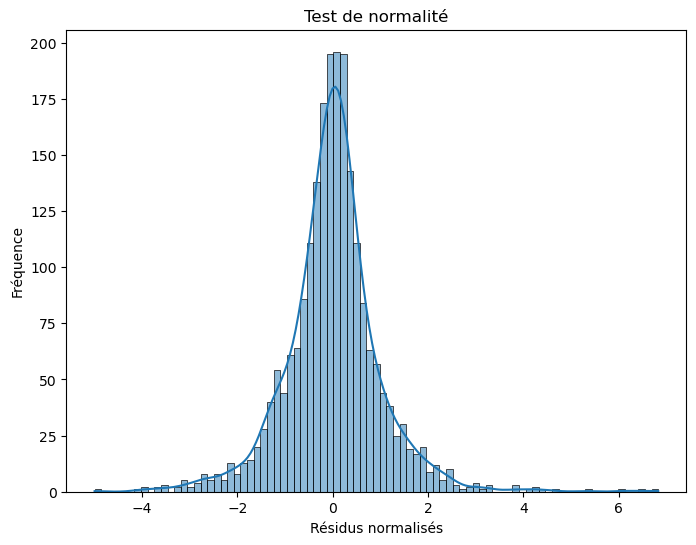

In [311]:
# Test de normalité
resid_norm = lr_modelb_2.get_influence().resid_studentized_internal
plt.figure(figsize=(8, 6))
sns.histplot(resid_norm, kde=True)
plt.title('Test de normalité')
plt.xlabel('Résidus normalisés')
plt.ylabel('Fréquence')
plt.show()


In [312]:
# Obtention des prédictions et des métriques d'évaluation
lr2_y_train_pred = lr_modelb_2.predict(sm.add_constant(Xs_train))
lr2_y_test_pred = lr_modelb_2.predict(sm.add_constant(Xs_test))
r2_train = r2_score(ys_train, np.exp(lr2_y_train_pred))
r2_test = r2_score(ys_test, np.exp(lr2_y_test_pred))
mse_train = mean_squared_error(ys_train, np.exp(lr2_y_train_pred))
mse_test = mean_squared_error(ys_test, np.exp(lr2_y_test_pred))
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)



# Construction du tableau de résultats

df_metrics = pd.DataFrame({
    'Métrique': ['R2', 'MSE', 'RMSE'],
    'Train': [r2_train, mse_train, rmse_train],
    'Test': [r2_test, mse_test, rmse_test]
})

print(df_metrics)

  Métrique         Train          Test
0       R2  9.971283e-01  9.963389e-01
1      MSE  1.973489e+09  2.606037e+09
2     RMSE  4.442397e+04  5.104935e+04


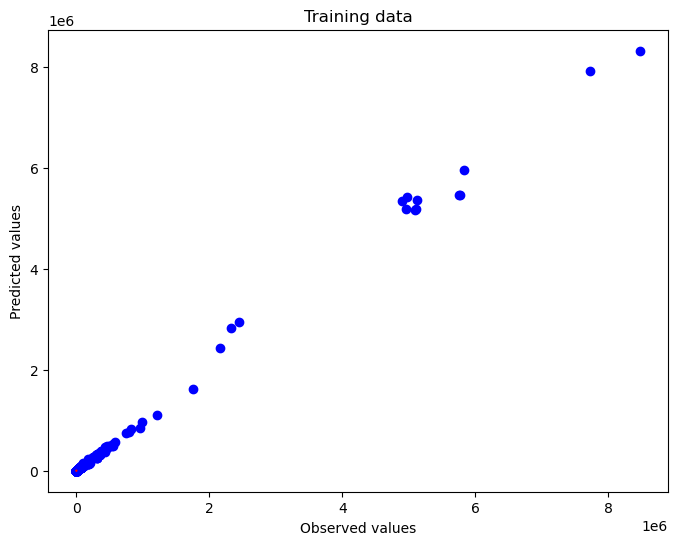

In [313]:
# Tracer les valeurs observées en fonction des valeurs prédites sur les données d'entraînement
plt.figure(figsize=(8, 6))
plt.scatter(ys_test, np.exp(lr2_y_test_pred), color='blue')
plt.xlabel('Observed values')
plt.ylabel('Predicted values')
plt.title('Training data')
plt.plot(np.arange(0, 55, 5), np.arange(0, 55, 5), color='red')
plt.show()

In [314]:
import plotly.express as px

fig=px.scatter(x=np.exp(lr2_y_test_pred),y=y_test,labels={'x': 'Émissions de CO2 (kt par pays) prédite' , 'y': 'Émissions de CO2 (kt par pays) observée'})
fig.show()

##### **Etape 3** : Régression avec pénalisation lasso, ridge, elastic-net

## Régression Ridge

La régression Ridge est une technique de régression linéaire régularisée qui utilise une pénalité de L2 pour réduire les coefficients des variables non pertinentes proches de zéro. Elle est souvent utilisée pour la régression dans des problèmes de haute dimensionnalité.

### Avantages de la régression Ridge

- La régression Ridge peut aider à réduire la variance et à améliorer la stabilité des modèles, en limitant la croissance des coefficients des variables.
- La régression Ridge est moins sensible aux valeurs aberrantes et aux données manquantes que la régression Lasso.

### Inconvénients de la régression Ridge

- La régression Ridge ne peut pas sélectionner de variables, elle peut donc inclure des variables non pertinentes dans le modèle.
- La régression Ridge peut avoir des difficultés à fonctionner correctement si les variables sont fortement corrélées.

### Fonction de coût de la régression Ridge

La fonction de coût de la régression Ridge est définie comme :

$$ J(w) = \frac{1}{2m} \left( ||Xw - y||^2 + \alpha ||w||_2^2 \right) $$

où `J(w)` est la fonction de coût, `w` est le vecteur des coefficients de régression, `X` est la matrice de conception (ou matrice des variables explicatives), `y` est le vecteur des valeurs cibles, `m` est le nombre d'échantillons, `||Xw - y||^2` est l'erreur de prédiction, `alpha` est le coefficient de régularisation et `||w||_2^2` est la norme L2 des coefficients.

La régularisation L2 introduit une pénalité qui force tous les coefficients à rester petits, ce qui peut réduire la variance du modèle.

In [315]:
from sklearn.linear_model import Lasso, LassoCV,RidgeCV,Ridge,ElasticNet,ElasticNetCV
from sklearn.model_selection import train_test_split,cross_val_score

# Créer et ajuster le modèle RidgeCV
alphas = np.linspace(0.01, 1, 100) # Liste des valeurs possibles pour le paramètre alpha
ridge_cv = RidgeCV(alphas=alphas, cv=7) # cv est le nombre de plis (folds) pour la validation croisée
ridge_cv.fit(X_train, log_y_train)

# Obtenir le meilleur paramètre alpha
best_alpha = ridge_cv.alpha_
print(f"Best alpha: {best_alpha}")

/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=7.60126e-19): result may not be accurate.

/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=7.5871e-19): result may not be accurate.

/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=7.46547e-19): result may not be accurate.

/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=7.46447e-19): result may not be accurate.

/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=8.46429e-19): result may

Best alpha: 0.01


/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=7.8358e-17): result may not be accurate.

/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=9.73466e-17): result may not be accurate.

/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=9.53532e-17): result may not be accurate.

/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=9.5512e-17): result may not be accurate.

/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=9.35292e-17): result may 

In [316]:
prev=ridge_cv.predict(X_test)
print("R2=",r2_score(y_test,np.exp(prev)))
print("MSE=",mean_squared_error(np.exp(prev),y_test))

print("RMSE=",np.sqrt(mean_squared_error(np.exp(prev),y_test)))

R2= 0.9975099068336238
MSE= 1772516323.2646406
RMSE= 42101.262727674104


In [231]:
# Erreur quadratique moyenne
from sklearn.metrics import r2_score
print("R2=",r2_score(log_y_test,X_test["Accès à des combustibles propres pour la cuisson"]))

R2= -742.0960783944332


In [165]:
import plotly.express as px

fig=px.scatter(x=X_test["Accès à des combustibles propres pour la cuisson"],y=log_y_test,labels={'x': 'Accès à des combustibles propres pour la cuisson' , 'y': 'CO2 observé'})
fig.show()

In [160]:
fig=px.scatter(x=X_test["Accès à des combustibles propres pour la cuisson"],y=X_test["Accès à des combustibles propres pour la cuisson"]-log_y_test,labels={'x': 'Accès à des combustibles propres pour la cuisson"' , 'y': 'Residus'})
fig.show()

In [317]:
import plotly.express as px

fig=px.scatter(x=np.exp(prev),y=y_test,labels={'x': 'Émissions de CO2 (kt par pays) prédite' , 'y': 'Émissions de CO2 (kt par pays) observée'})

fig.show()

In [233]:
fig=px.scatter(x=prev,y=log_y_test-prev,labels={'x': 'Prédite' , 'y': 'Résidus'})
fig.show()

/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=7.68391e-19): result may not be accurate.

/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=7.29559e-19): result may not be accurate.

/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=7.87015e-19): result may not be accurate.

/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=7.06936e-19): result may not be accurate.

/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=7.30656e-19): result ma

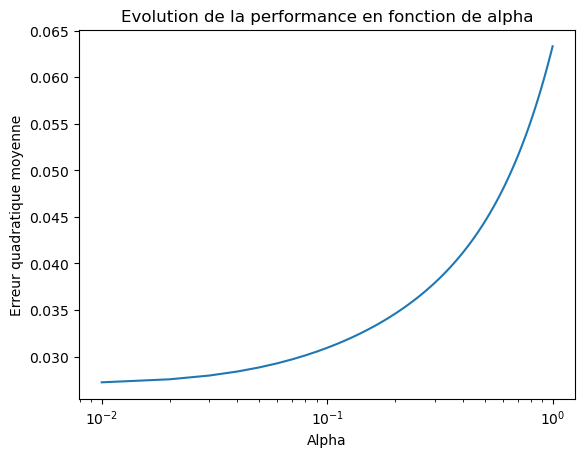

In [234]:
mse_scores = []
for alpha in alphas:
    model = Ridge(alpha=alpha)
    mse_score = np.mean(-cross_val_score(model, X_train, log_y_train, scoring='neg_mean_squared_error', cv=5))
    mse_scores.append(mse_score)

plt.plot(alphas, mse_scores)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Erreur quadratique moyenne')
plt.title('Evolution de la performance en fonction de alpha')
plt.show()

## Régression LASSO

La régression Lasso est une technique de régression linéaire régularisée qui utilise une pénalité de L1 pour réduire les coefficients des variables non pertinentes à zéro. Elle est souvent utilisée pour la sélection de variables et la réduction de dimensionnalité dans les problèmes de régression.

### Avantages de la régression Lasso

- La régression Lasso peut être utilisée pour sélectionner les variables les plus importantes dans un modèle de régression, ce qui peut améliorer la compréhension des relations entre les variables.
- La régression Lasso peut aider à réduire la dimensionnalité des données, en éliminant les variables qui ont peu d'impact sur la prédiction.

### Inconvénients de la régression Lasso

- La régression Lasso peut être sensible aux valeurs aberrantes (outliers) et aux données manquantes, ce qui peut entraîner des coefficients mal estimés.
- La régression Lasso peut ne pas fonctionner correctement si les variables sont fortement corrélées, car elle peut avoir des difficultés à sélectionner les variables les plus importantes.

### Fonction de coût de la régression Lasso

La fonction de coût de la régression Lasso est définie comme :
    $$ J(w) = \frac{1}{2m} \left( ||Xw - y||^2 + \alpha ||w||_1 \right) $$
    où `J(w)` est la fonction de coût, `w` est le vecteur des coefficients de régression, `X` est la matrice de conception (ou matrice des variables explicatives), `y` est le vecteur des valeurs cibles, `m` est le nombre d'échantillons, `||Xw - y||^2` est l'erreur de prédiction, `alpha` est le coefficient de régularisation et `||w||_1` est la norme L1 des coefficients.

La régularisation L1 introduit une pénalité qui force certains coefficients à devenir exactement égaux à zéro, ce qui peut conduire à un modèle parcimonieux et plus interprétable.

In [318]:
from sklearn.linear_model import LassoCV

# Créer et ajuster le modèle LassoCV
alphas = [0.001, 1.0, 10.0, 100.0]
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X_train, log_y_train)

# Obtenir le meilleur paramètre alpha
best_alpha = lasso_cv.alpha_
print(f"Best alpha: {best_alpha}")

Best alpha: 0.001


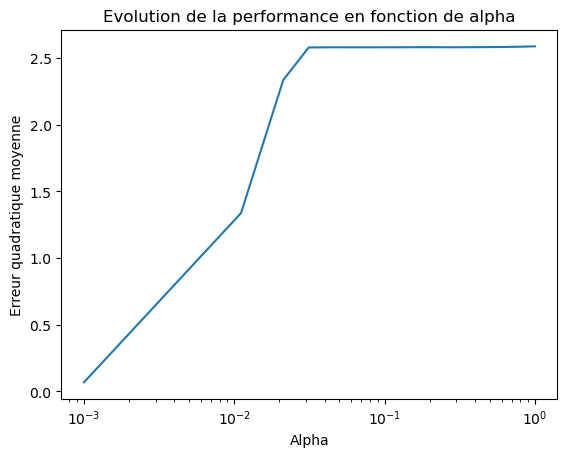

In [319]:
# Tracer le graphique d'évolution des performances en fonction de l'alpha
alphas = np.linspace(0.001, 1, 100) # Liste des valeurs possibles pour le paramètre alpha
mse_scores = []
for alpha in alphas:
    model = Lasso(alpha=alpha)
    mse_score = np.mean(-cross_val_score(model, X_train, log_y_train, scoring='neg_mean_squared_error', cv=5))
    mse_scores.append(mse_score)

plt.plot(alphas, mse_scores)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Erreur quadratique moyenne')
plt.title('Evolution de la performance en fonction de alpha')
plt.show()

In [320]:
prev=lasso_cv.predict(X_test)

print("R2=",r2_score(y_test,np.exp(prev)))
print("MSE=",mean_squared_error(np.exp(prev),y_test))

print("RMSE=",np.sqrt(mean_squared_error(np.exp(prev),y_test)))

R2= 0.9722404248652023
MSE= 19760023728.320263
RMSE= 140570.35152662976


In [321]:
import plotly.express as px

fig=px.scatter(x=np.exp(prev),y=y_test,labels={'x': 'Émissions de CO2 (kt par pays) prédite' , 'y': 'Émissions de CO2 (kt par pays) observée'})
fig.show()

## Régression Elastic Net

La régression Elastic Net est une technique de régression linéaire régularisée qui utilise une combinaison des pénalités de L1 et de L2 pour réduire les coefficients des variables non pertinentes proches de zéro. Elle est souvent utilisée pour la sélection de variables et la réduction de dimensionnalité dans les problèmes de régression.

### Avantages de la régression Elastic Net

- La régression Elastic Net peut aider à réduire la variance et à améliorer la stabilité des modèles, en combinant les avantages de la régression Lasso et de la régression Ridge.
- La régression Elastic Net peut être utilisée pour sélectionner les variables les plus importantes dans un modèle de régression, ce qui peut améliorer la compréhension des relations entre les variables.

### Inconvénients de la régression Elastic Net

- La régression Elastic Net peut être plus complexe à mettre en œuvre que la régression Lasso ou Ridge, car elle nécessite de déterminer deux paramètres de régularisation.
- La régression Elastic Net peut avoir des difficultés à fonctionner correctement si les variables sont fortement corrélées.

### Fonction de coût de la régression Elastic Net

La fonction de coût de la régression Elastic Net est définie comme :

$$ J(w) = \frac{1}{2m} \left( ||Xw - y||^2 + \alpha \rho ||w||_1 + \frac{\alpha(1-\rho)}{2} ||w||_2^2 \right) $$

où `J(w)` est la fonction de coût, `w` est le vecteur des coefficients de régression, `X` est la matrice de conception (ou matrice des variables explicatives), `y` est le vecteur des valeurs cibles, `m` est le nombre d'échantillons, `||Xw - y||^2` est l'erreur de prédiction, `alpha` est le coefficient de régularisation, `rho` est le paramètre d'élasticité et `||w||_1` et `||w||_2^2` sont les normes L1 et L2 des coefficients.

La régularisation Elastic Net introduit une pénalité qui force à la fois la sparsité des coefficients et leur magnitude globale, ce qui peut conduire à des modèles plus parcimonieux et plus stables.


In [322]:
# Créer un modèle de régression ElasticNet avec validation croisée de ElasticNetCV
elasticNet = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=np.logspace(-5, 5, 11), cv=5)

# Ajuster le modèle aux données
elasticNet.fit(X_train, log_y_train)

# Trouver le meilleur alpha et le meilleur l1_ratio
best_alpha = elasticNet.alpha_
best_l1_ratio = elasticNet.l1_ratio_

# Imprimer le meilleur alpha et le meilleur l1_ratio
print("Meilleur alpha:", best_alpha)
print("Meilleur l1_ratio:", best_l1_ratio)

/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 59.200904292335196, tolerance: 1.0039475550035724

/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.103616708311243, tolerance: 1.0039475550035724

/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 60.03816677370736, tolerance: 1.0225193524254064

/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent

Meilleur alpha: 1e-05
Meilleur l1_ratio: 1.0


/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.984e+01, tolerance: 1.278e+00



/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.411e+01, tolerance: 1.004e+00

/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.496e+01, tolerance: 1.023e+00

/Users/hugoguilbot/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

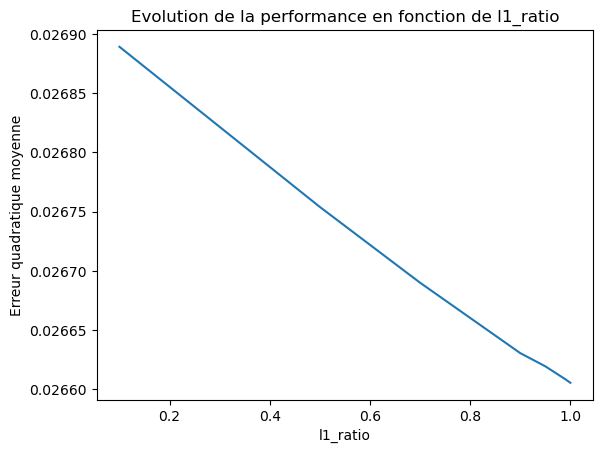

In [323]:
# Tracer le graphique d'évolution des performances en fonction de l'alpha
alphas = np.logspace(-5, 5, 11)
mse_scores = {}
for l1_ratio in [.1, .5, .7, .9, .95, .99, 1]:
    model = ElasticNet(alpha=best_alpha, l1_ratio=l1_ratio)
    mse_score = np.mean(-cross_val_score(model, X_train, log_y_train, scoring='neg_mean_squared_error', cv=5))
    mse_scores[l1_ratio] = mse_score

plt.plot(list(mse_scores.keys()), list(mse_scores.values()))
plt.xlabel('l1_ratio')
plt.ylabel('Erreur quadratique moyenne')
plt.title('Evolution de la performance en fonction de l1_ratio')
plt.show()

In [324]:
prev=elasticNet.predict(X_test)

print("R2=",r2_score(y_test,np.exp(prev)))
print("MSE=",mean_squared_error(np.exp(prev),y_test))

print("RMSE=",np.sqrt(mean_squared_error(np.exp(prev),y_test)))

R2= 0.9976489455896194
MSE= 1673544739.4314408
RMSE= 40908.98115856029


In [325]:
import plotly.express as px

fig=px.scatter(x=np.exp(prev),y=y_test,labels={'x': 'Émissions de CO2 (kt par pays) prédite' , 'y': 'Émissions de CO2 (kt par pays) observée'})
fig.show()

# Resumé

In [326]:
# Obtention des prédictions et des métriques d'évaluation
lr1_y_train_pred = lr_model_1.predict(sm.add_constant(X_train))
lr1_y_test_pred = lr_model_1.predict(sm.add_constant(X_test))
r2_train = r2_score(y_train, np.exp(lr1_y_train_pred))
r2_test = r2_score(y_test, np.exp(lr1_y_test_pred))
mse_train = mean_squared_error(y_train, np.exp(lr1_y_train_pred))
mse_test = mean_squared_error(y_test, np.exp(lr1_y_test_pred))
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Construction du tableau de résultats

df_metrics = pd.DataFrame({
    'Métrique': ['R2', 'MSE', 'RMSE'],
    'Train': [r2_train, mse_train, rmse_train],
    'Test': [r2_test, mse_test, rmse_test]
})

print(df_metrics)

  Métrique         Train          Test
0       R2  9.978521e-01  9.972484e-01
1      MSE  1.476124e+09  1.958645e+09
2     RMSE  3.842036e+04  4.425658e+04


In [327]:
# # Créer des modèles de régression Ridge, Lasso et ElasticNet avec validation croisée
# ridge_model = RidgeCV(alphas=np.logspace(-5, 5, 11), cv=5)
# lasso_model = LassoCV(alphas=np.logspace(-5, 5, 11), cv=5)
# enet_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=np.logspace(-5, 5, 11), cv=5)

# # Ajuster les modèles aux données d'apprentissage
# ridge_model.fit(X_train, log_y_train)
# lasso_model.fit(X_train, log_y_train)
# enet_model.fit(X_train, log_y_train)

# Prédire les valeurs pour les données d'apprentissage et de test
lr1_y_train_pred = lr_model_1.predict(sm.add_constant(X_train))
lr1_y_test_pred = lr_model_1.predict(sm.add_constant(X_test))

lr2_y_train_pred = lr_modelb_2.predict(sm.add_constant(Xs_train))
lr2_y_test_pred = lr_modelb_2.predict(sm.add_constant(Xs_test))

ridge_train_pred = ridge_cv.predict(X_train)
ridge_test_pred = ridge_cv.predict(X_test)

lasso_train_pred = lasso_cv.predict(X_train)
lasso_test_pred = lasso_cv.predict(X_test)

enet_train_pred = elasticNet.predict(X_train)
enet_test_pred = elasticNet.predict(X_test)

# Calculer le R2 et le RMSE pour les données d'apprentissage et de test
#model 1 sans selection et sans pénalisation
lr1_r2_train = r2_score(y_train, np.exp(lr1_y_train_pred))
lr1_r2_test = r2_score(y_test, np.exp(lr1_y_test_pred))
lr1_mse_train = mean_squared_error(y_train, np.exp(lr1_y_train_pred))
lr1_mse_test = mean_squared_error(y_test, np.exp(lr1_y_test_pred))
lr1_rmse_train = np.sqrt(lr1_mse_train)
lr1_rmse_test = np.sqrt(lr1_mse_test)
#model 2 avec sélection ef sans pénalisation
lr2_r2_train = r2_score(ys_train, np.exp(lr2_y_train_pred))
lr2_r2_test = r2_score(ys_test, np.exp(lr2_y_test_pred))
lr2_mse_train = mean_squared_error(ys_train, np.exp(lr2_y_train_pred))
lr2_mse_test = mean_squared_error(ys_test, np.exp(lr2_y_test_pred))
lr2_rmse_train = np.sqrt(lr2_mse_train)
lr2_rmse_test = np.sqrt(lr2_mse_test)

ridge_train_r2 = r2_score(y_train, np.exp(ridge_train_pred))
ridge_test_r2 = r2_score(y_test, np.exp(ridge_test_pred))
ridge_train_mse = mean_squared_error(y_train, np.exp(ridge_train_pred))
ridge_test_mse = mean_squared_error(y_test, np.exp(ridge_test_pred))
ridge_train_rmse = np.sqrt(ridge_train_mse)
ridge_test_rmse = np.sqrt(ridge_test_mse)

lasso_train_r2 = r2_score(y_train, np.exp(lasso_train_pred))
lasso_test_r2 = r2_score(y_test, np.exp(lasso_test_pred))
lasso_train_mse = mean_squared_error(y_train, np.exp(lasso_train_pred))
lasso_test_mse = mean_squared_error(y_test, np.exp(lasso_test_pred))
lasso_train_rmse = np.sqrt(lasso_train_mse)
lasso_test_rmse = np.sqrt(lasso_test_mse)

enet_train_r2 = r2_score(y_train, np.exp(enet_train_pred))
enet_test_r2 = r2_score(y_test, np.exp(enet_test_pred))
enet_train_mse = mean_squared_error(np.exp(enet_train_pred),y_train)
enet_test_mse = mean_squared_error(np.exp(enet_test_pred),y_test)
enet_train_rmse = np.sqrt(enet_train_mse)
enet_test_rmse = np.sqrt(enet_test_mse)

In [328]:
data = {'Modèle': ['Régression linéaire sans sélection de variables','Régression linéaire avec sélection de variables','Ridge', 'Lasso', 'ElasticNet'],
'R2 sur base train': [lr1_r2_train,lr2_r2_train,ridge_train_r2, lasso_train_r2, enet_train_r2],
'R2 sur base test': [lr1_r2_test,lr2_r2_test,ridge_test_r2, lasso_test_r2, enet_test_r2],
'MSE sur base de train' : [lr1_mse_train,lr2_mse_train,ridge_train_mse,lasso_train_mse,enet_train_mse],
'MSE sur base de test' : [lr1_mse_test,lr2_mse_test,ridge_test_mse,lasso_test_mse,enet_test_mse],
'RMSE sur base train': [lr1_rmse_train,lr2_rmse_train,ridge_train_rmse, lasso_train_rmse, enet_train_rmse],
'RMSE sur base test': [lr1_rmse_test,lr2_rmse_test,ridge_test_rmse, lasso_test_rmse, enet_test_rmse]}

df = pd.DataFrame(data)
df

,Modèle,R2 sur base train,R2 sur base test,MSE sur base de train,MSE sur base de test,RMSE sur base train,RMSE sur base test
0,Régression linéaire sans sélection de variables,0.997852,0.997248,1.476124e+09,1.958645e+09,38420.355792,44256.581836
1,Régression linéaire avec sélection de variables,0.997128,0.996339,1.973489e+09,2.606037e+09,44423.966044,51049.353697
2,Ridge,0.997989,0.997510,1.381779e+09,1.772516e+09,37172.288991,42101.262728
3,Lasso,0.968598,0.972240,2.158025e+10,1.976002e+10,146902.193687,140570.351527
4,ElasticNet,0.998181,0.997649,1.249887e+09,1.673545e+09,35353.736519,40908.981159


# Arbre optimal

In [329]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
import math
from sklearn.metrics import mean_squared_error, confusion_matrix, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from numpy import arange
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error

In [330]:
pgrid = {"max_depth": [10, 12, 15,20,30,40,50]}
decidion_grid = GridSearchCV(DecisionTreeRegressor(), param_grid=pgrid,
                              scoring='neg_mean_squared_error', cv=10, verbose=1, n_jobs=-1)
decidion_grid.fit(df_train_scaled, log_y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 12, 15, 20, 30, 40, 50]},
             scoring='neg_mean_squared_error', verbose=1)

In [331]:
decidion_grid.best_params_

{'max_depth': 15}

In [332]:
decision_model = decidion_grid.best_estimator_
decision_model

DecisionTreeRegressor(max_depth=15)

## Random Forest

### Hyperparameter selection

In [333]:
gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(2,10),
            'n_estimators': (10, 20, 30, 50, 75, 100, 200, 300)
        },
        cv=10, scoring='neg_root_mean_squared_error', verbose=1, n_jobs=-1)
grid_result = gsc.fit(df_train_scaled, log_y_train.values.ravel())

Fitting 10 folds for each of 64 candidates, totalling 640 fits


### Build the model

In [334]:
gsc.best_params_

{'max_depth': 9, 'n_estimators': 300}

In [335]:
rfr_model = gsc.best_estimator_
rfr_model

RandomForestRegressor(max_depth=9, n_estimators=300)

### Importance des variables

In [336]:
rf = RandomForestRegressor(n_estimators=100, max_depth=9, criterion='squared_error', max_features='sqrt')
rf.fit(df_train_scaled, y_train)

RandomForestRegressor(max_depth=9, max_features='sqrt')

In [337]:
# Store the top 10 most important features based of rf regressor
lt =  list(df_train_scaled.columns)
rf_feature_importance_df = pd.DataFrame(rf.feature_importances_, index=lt, columns=['Importance_Value'])
rf_top_features = rf_feature_importance_df.sort_values(by = ['Importance_Value'], ascending=False).head(10)

In [338]:
rf_feature_importance_df.head()

,Importance_Value
Accès à l'électricité (% de la population),0.009839
Accès à des combustibles propres pour la cuisson,0.018961
Part des énergies renouvelables dans la consommation finale totale d'énergie (%),0.023641
Électricité provenant des combustibles fossiles (TWh),0.268942
Électricité provenant du nucléaire (TWh),0.106119


/var/folders/rb/3zxqg6mj6j5dywyr7zz41drh0000gn/T/ipykernel_34066/1167239846.py:3: UserWarning:

FixedFormatter should only be used together with FixedLocator



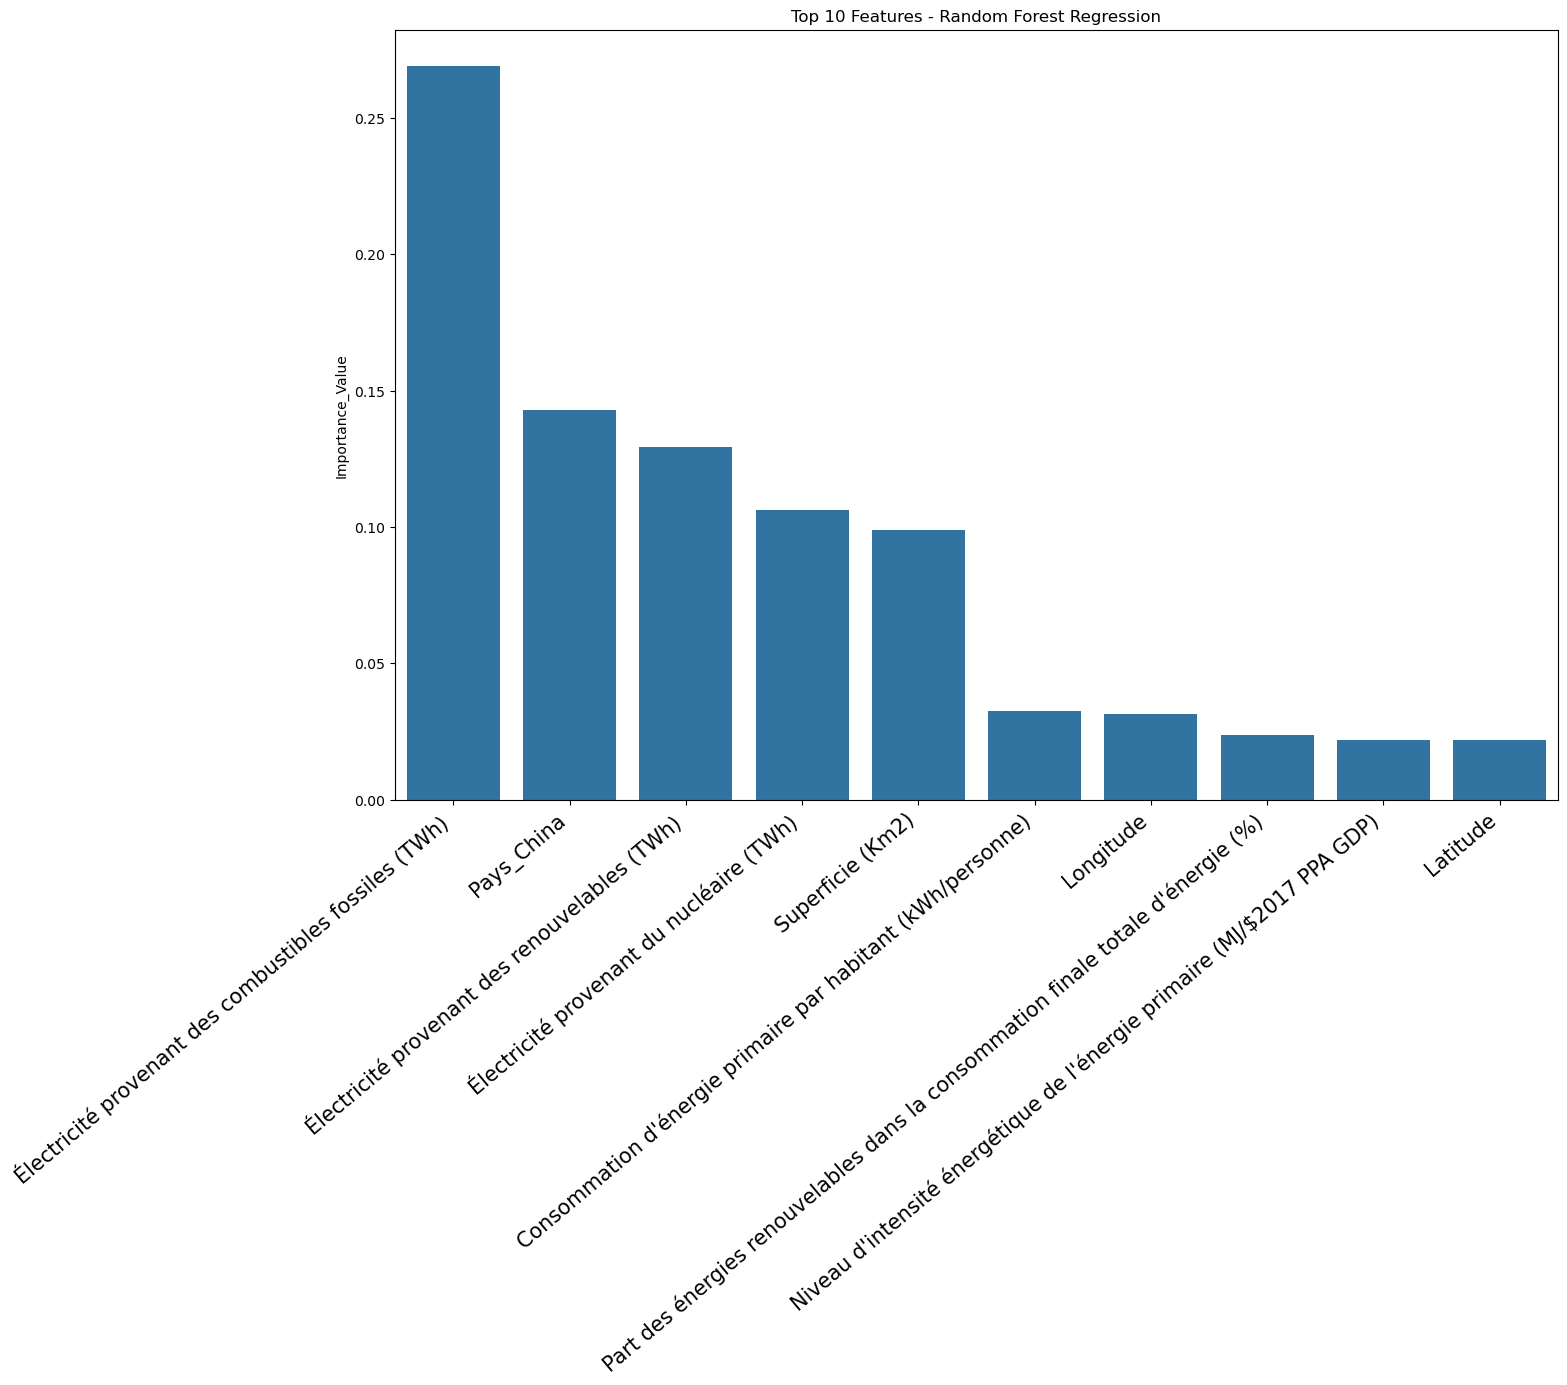

In [339]:
plt.figure(figsize=(15, 10))
ax0 = sns.barplot(x = rf_top_features.index, y = 'Importance_Value', data=rf_top_features)
ax0.set_xticklabels(ax0.get_xticklabels(), fontsize = 15, rotation=40, ha="right")
plt.title('Top 10 Features - Random Forest Regression')
plt.xlabel('')
plt.show()

## Gradient Boosting Regressor

In [340]:
parameters= {
    #'max_depth': range(2,10),
    "n_estimators": [100,200,300,400,500,600]
}

gradient_grid = GridSearchCV(estimator=GradientBoostingRegressor(random_state=21), 
                             param_grid=parameters, cv=10, scoring='neg_root_mean_squared_error', 
                             verbose=1, n_jobs=-1)

gradient_grid.fit(df_train_scaled, log_y_train.values.ravel())

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(random_state=21),
             n_jobs=-1,
             param_grid={'n_estimators': [100, 200, 300, 400, 500, 600]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [341]:
gradient_grid.best_params_

{'n_estimators': 600}

In [342]:
gradient_model = gradient_grid.best_estimator_

### Importance des variables Gradient Boosting

In [343]:
gbr = GradientBoostingRegressor(loss='squared_error', n_estimators=600, learning_rate=0.1, 
                                 max_features = 'sqrt',  
                                min_samples_split = 500, random_state=0)
gbr.fit(df_train_scaled, y_train)

GradientBoostingRegressor(max_features='sqrt', min_samples_split=500,
                          n_estimators=600, random_state=0)

In [344]:
# Store the top 10 most important features based of Gradient Boosting regressor
lt =  list(df_train_scaled.columns)
gb_feature_importance_df = pd.DataFrame(gbr.feature_importances_, index=lt, columns=['Importance_Value'])
gb_top_features = gb_feature_importance_df.sort_values(by = ['Importance_Value'], ascending=False).head(10)

/var/folders/rb/3zxqg6mj6j5dywyr7zz41drh0000gn/T/ipykernel_34066/2392321034.py:3: UserWarning:

FixedFormatter should only be used together with FixedLocator



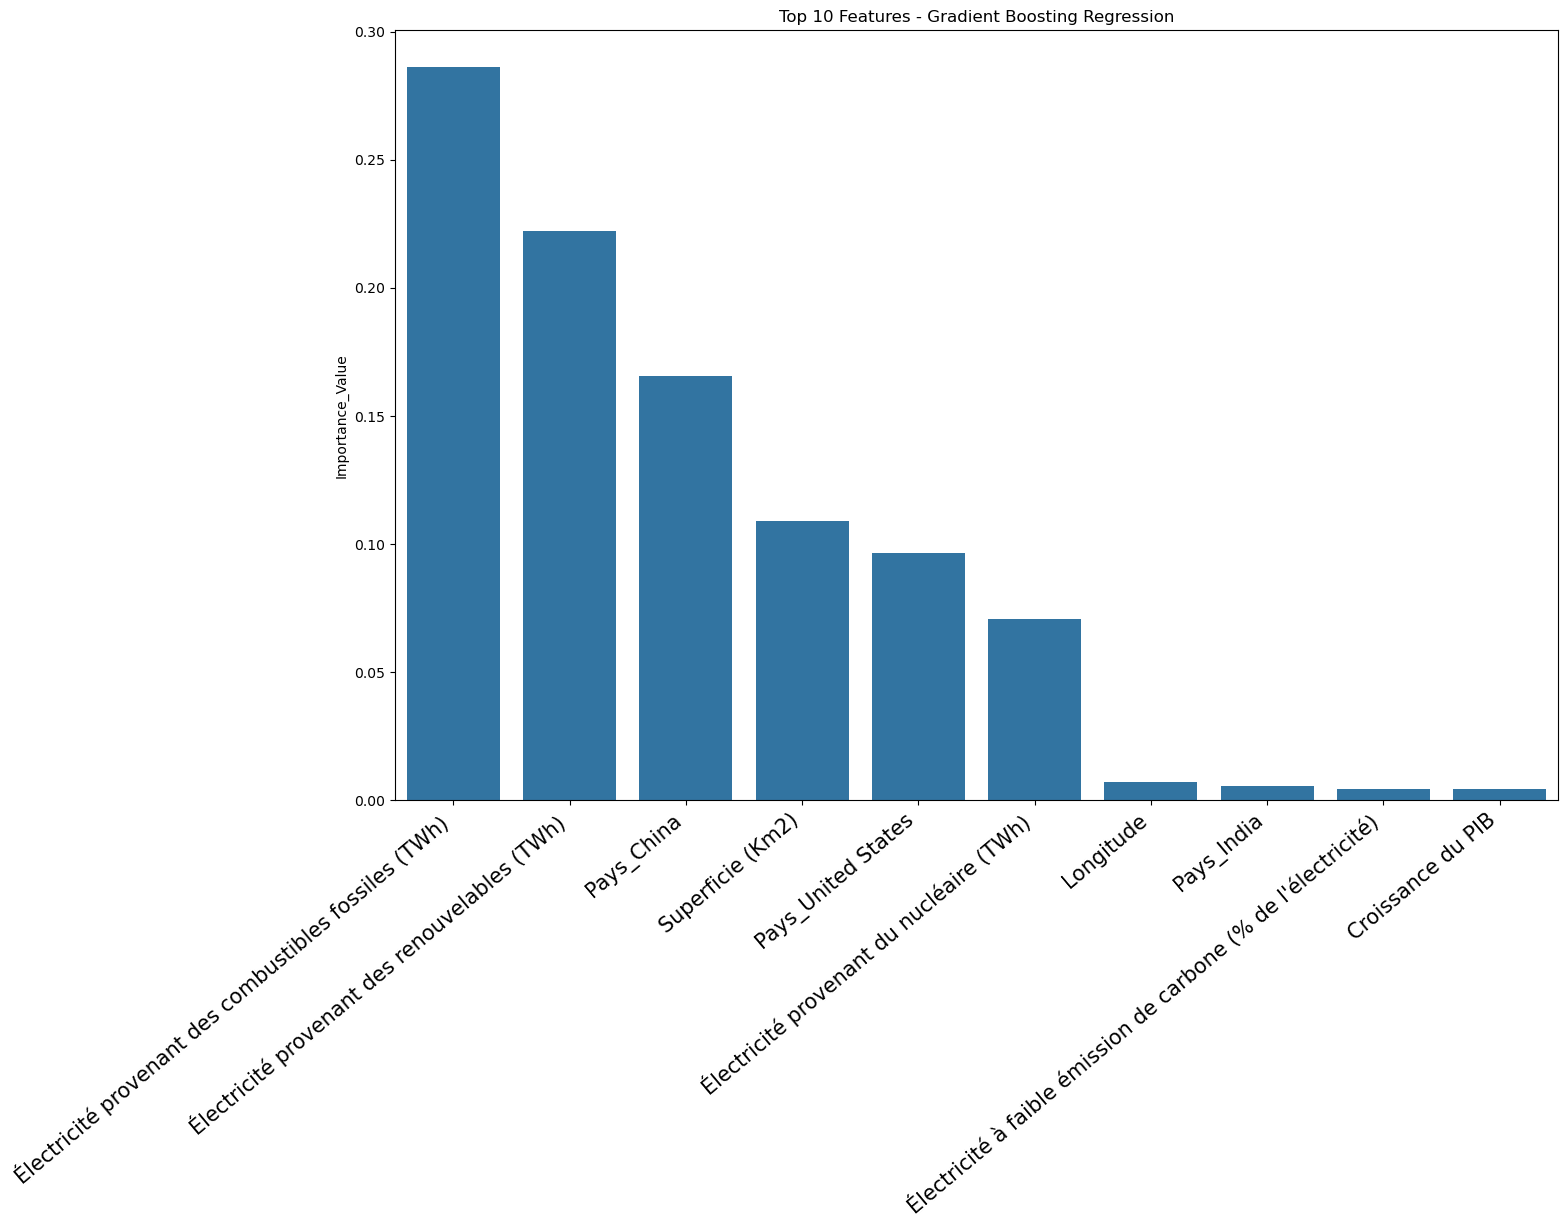

In [345]:
plt.figure(figsize=(15, 10))
ax0 = sns.barplot(x = gb_top_features.index, y = 'Importance_Value', data=gb_top_features)
ax0.set_xticklabels(ax0.get_xticklabels(), fontsize = 15, rotation=40, ha="right")
plt.title('Top 10 Features - Gradient Boosting Regression')
plt.xlabel('')
plt.show()

## Models Comparison

### Comparaison des résultats obtenus sur le training set

In [346]:
models = [decision_model, rfr_model, gradient_model]
x = ["Decision_tree", "RFR", "Gradient_Boosting"]
#score_reg = []
r2_scores = []
rmse = []
mae = []
mse = []

for model in models:
  y_pred = model.predict(df_train_scaled)
  r2_scores.append(r2_score(y_train, np.exp(y_pred)))
  rmse.append(mean_squared_error(y_train, np.exp(y_pred), squared = False)) # square =  False to have root mean square error
  mae.append(mean_absolute_error(y_train, np.exp(y_pred)))
  mse.append(mean_squared_error(y_train, np.exp(y_pred)))

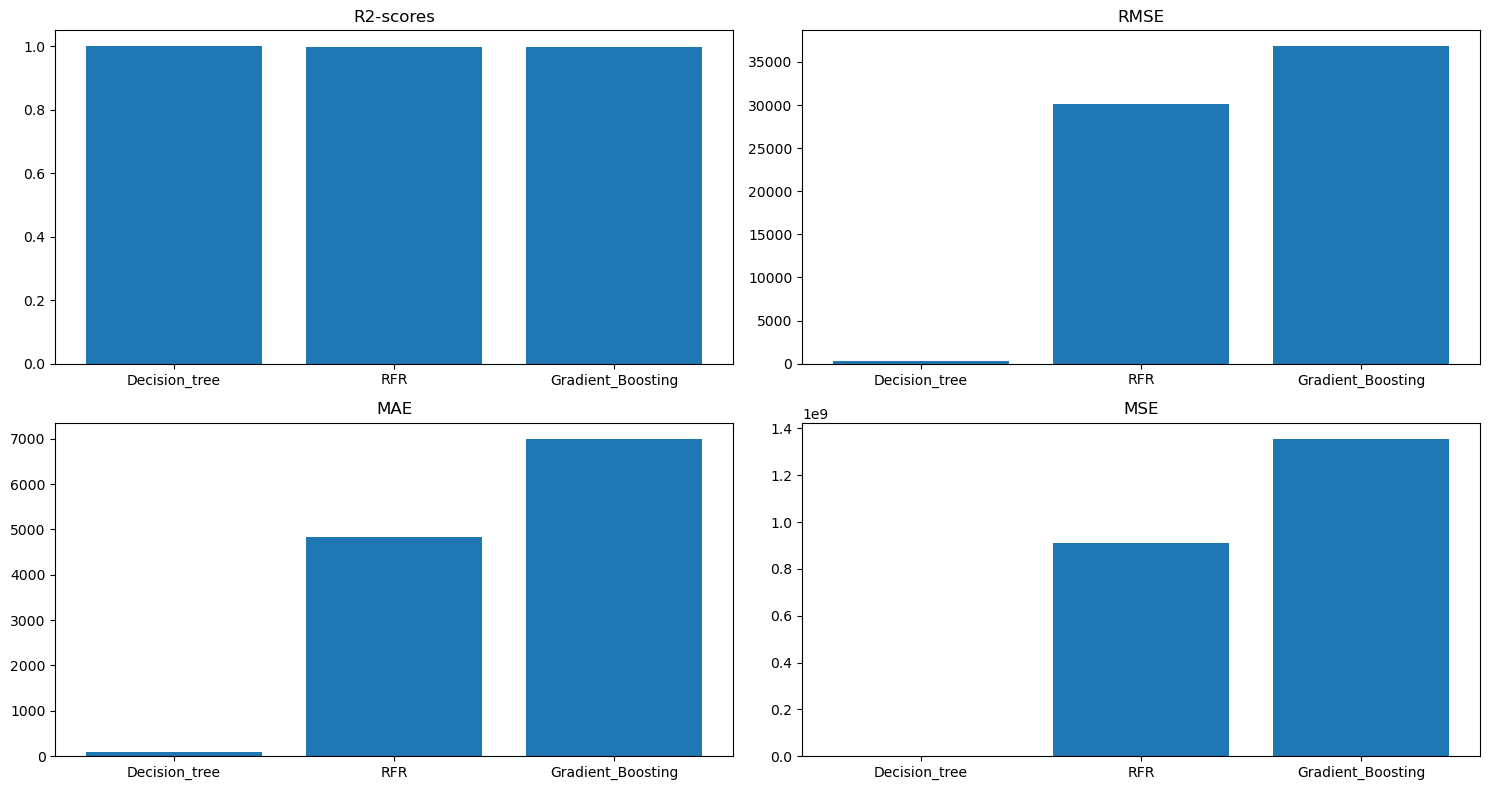

In [347]:
# plot the scores on training set
fig=plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
plt.bar(x, r2_scores)
plt.title("R2-scores")
plt.subplot(2, 2, 2)
plt.bar(x, rmse)
plt.title("RMSE")
plt.subplot(2, 2, 3)
plt.bar(x, mae)
plt.title("MAE")
plt.subplot(2, 2, 4)
plt.bar(x, mse)
plt.title("MSE")
plt.tight_layout()

In [348]:
rmse

[339.3683301757013, 30159.657920680635, 36824.40799210253]

### Comparaison des résultats obtenus sur le test set

In [349]:
df_test.head()

,Accès à l'électricité (% de la population),Accès à des combustibles propres pour la cuisson,Part des énergies renouvelables dans la consommation finale totale d'énergie (%),Électricité provenant des combustibles fossiles (TWh),Électricité provenant du nucléaire (TWh),Électricité provenant des renouvelables (TWh),Électricité à faible émission de carbone (% de l'électricité),Consommation d'énergie primaire par habitant (kWh/personne),Niveau d'intensité énergétique de l'énergie primaire (MJ/$2017 PPA GDP),Croissance du PIB,...,Année_2010,Année_2011,Année_2012,Année_2013,Année_2014,Année_2015,Année_2016,Année_2017,Année_2018,Année_2019
0,-0.851809,-1.317658,1.618115,-0.194966,-0.196016,-0.193985,0.901409,-0.658954,-0.496426,1.336808,...,4.311951,-0.23083,-0.228651,-0.224242,-0.232993,-0.234068,-0.231914,-0.228651,-0.228651,-0.236208
1,0.018269,-0.516254,0.532570,-0.195415,-0.196016,-0.231455,-0.203913,-0.591681,-0.174443,0.277531,...,-0.231914,-0.23083,-0.228651,-0.224242,-0.232993,-0.234068,-0.231914,-0.228651,-0.228651,-0.236208
2,-2.167915,-1.514180,1.534818,-0.200111,-0.196016,-0.228369,1.448186,-0.682019,-0.067115,0.350482,...,-0.231914,-0.23083,-0.228651,-0.224242,-0.232993,-0.234068,-0.231914,-0.228651,-0.228651,-0.236208
3,-2.233878,-1.560121,1.961378,-0.200507,-0.196016,-0.239213,1.745031,-0.694884,0.819027,0.231926,...,-0.231914,-0.23083,-0.228651,-0.224242,-0.232993,-0.234068,-0.231914,-0.228651,-0.228651,-0.236208
4,0.723895,0.384688,0.306863,-0.200111,-0.196016,-0.100532,1.717370,-0.478082,-0.276266,0.621952,...,-0.231914,-0.23083,-0.228651,-0.224242,4.291975,-0.234068,-0.231914,-0.228651,-0.228651,-0.236208


In [350]:
# comparaison des rmse sur le test set
models = [decision_model, rfr_model, gradient_model]
x = ["Decision_tree", "RFR", "Gradient_Boosting"]
#score_reg = []
r2_scores_test = []
rmse_test = []
mae_test = []
mse_test = []

for model in models:
  y_pred = model.predict(df_test )
  r2_scores_test.append(r2_score(y_test, np.exp(y_pred)))
  rmse_test.append(mean_squared_error(y_test, np.exp(y_pred), squared = False)) # square =  False to have root mean square error
  mae_test.append(mean_absolute_error(y_test, np.exp(y_pred)))
  mse_test.append(mean_squared_error(y_test, np.exp(y_pred)))

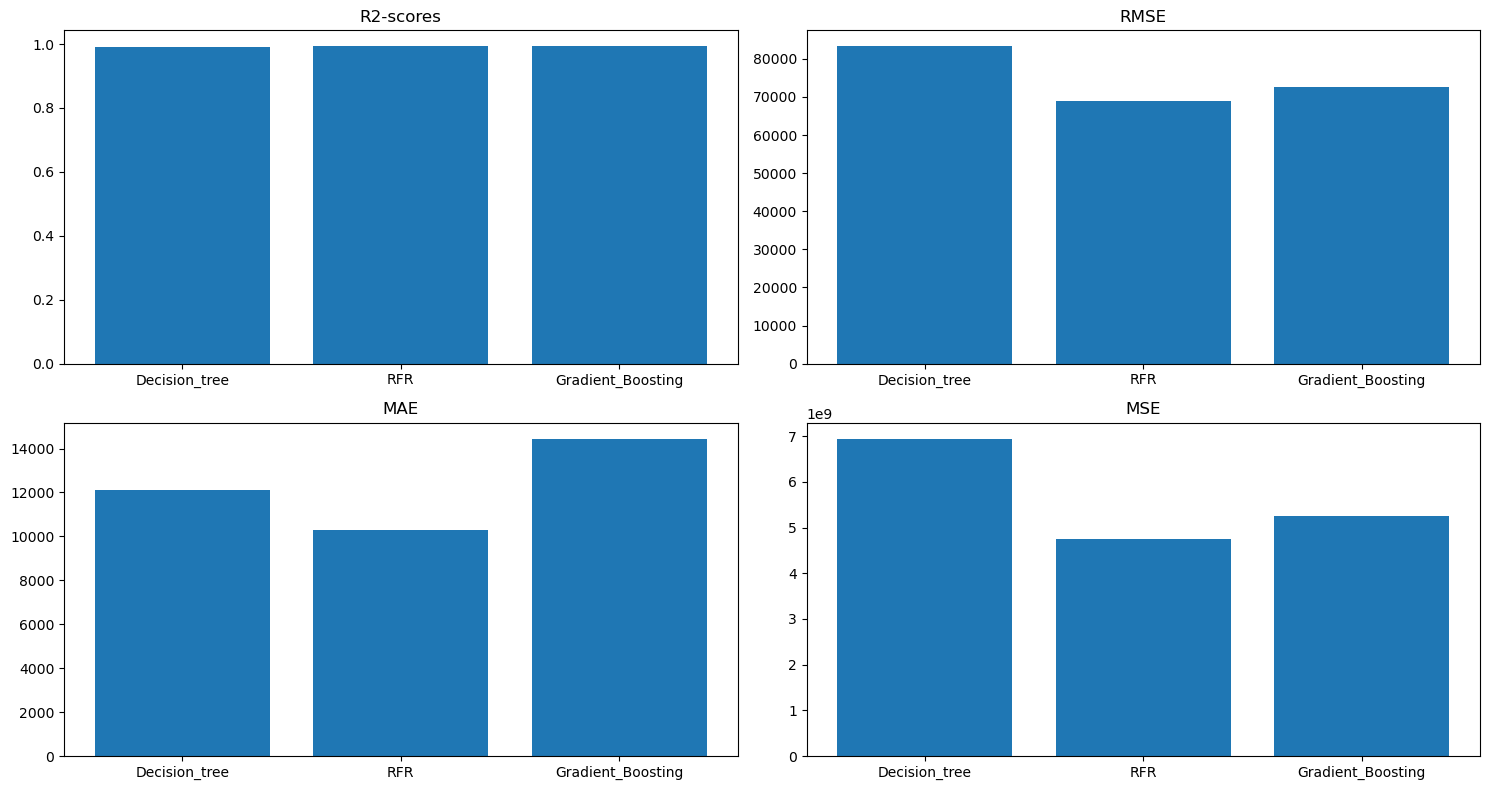

In [351]:
# plot the scores on test set
fig=plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
plt.bar(x, r2_scores_test)
plt.title("R2-scores")
plt.subplot(2, 2, 2)
plt.bar(x, rmse_test)
plt.title("RMSE")
plt.subplot(2, 2, 3)
plt.bar(x, mae_test)
plt.title("MAE")
plt.subplot(2, 2, 4)
plt.bar(x, mse_test)
plt.title("MSE")
plt.tight_layout()

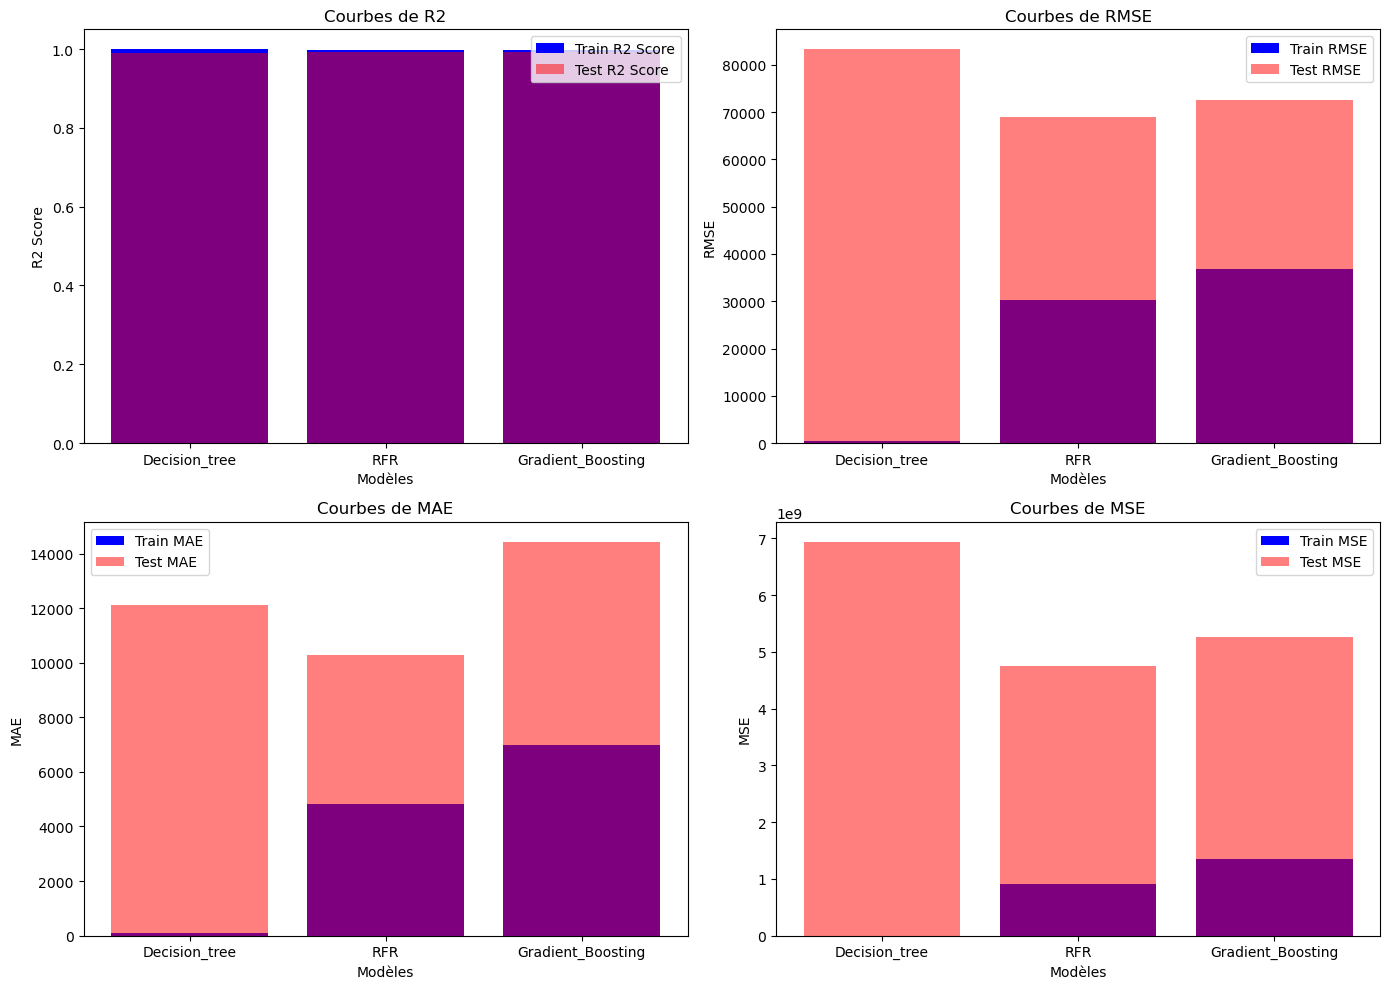

In [352]:
# Définition des modèles et de leurs noms
models = [decision_model, rfr_model, gradient_model]
model_names = ["Decision_tree", "RFR", "Gradient_Boosting"]

# Initialisation des listes pour stocker les scores
train_r2_scores = []
train_rmse = []
train_mae = []
train_mse = []

test_r2_scores = []
test_rmse = []
test_mae = []
test_mse = []

# Calcul des scores pour chaque modèle
for model in models:
    # Prédiction sur les données d'entraînement
    y_pred_train = model.predict(df_train_scaled)
    train_r2_scores.append(r2_score(y_train, np.exp(y_pred_train)))
    train_rmse.append(mean_squared_error(y_train, np.exp(y_pred_train), squared=False))
    train_mae.append(mean_absolute_error(y_train, np.exp(y_pred_train)))
    train_mse.append(mean_squared_error(y_train, np.exp(y_pred_train)))

    # Prédiction sur les données de test
    y_pred_test = model.predict(df_test)
    test_r2_scores.append(r2_score(y_test, np.exp(y_pred_test)))
    test_rmse.append(mean_squared_error(y_test, np.exp(y_pred_test), squared=False))
    test_mae.append(mean_absolute_error(y_test, np.exp(y_pred_test)))
    test_mse.append(mean_squared_error(y_test, np.exp(y_pred_test)))

# Visualisation des courbes d'apprentissage et d'évaluation
plt.figure(figsize=(14, 10))

# Courbes de R2
plt.subplot(2, 2, 1)
plt.bar(model_names, train_r2_scores, color='b', label='Train R2 Score')
plt.bar(model_names, test_r2_scores, color='r', alpha=0.5, label='Test R2 Score')
plt.xlabel('Modèles')
plt.ylabel('R2 Score')
plt.title('Courbes de R2')
plt.legend()

# Courbes de RMSE
plt.subplot(2, 2, 2)
plt.bar(model_names, train_rmse, color='b', label='Train RMSE')
plt.bar(model_names, test_rmse, color='r', alpha=0.5, label='Test RMSE')
plt.xlabel('Modèles')
plt.ylabel('RMSE')
plt.title('Courbes de RMSE')
plt.legend()

# Courbes de MAE
plt.subplot(2, 2, 3)
plt.bar(model_names, train_mae, color='b', label='Train MAE')
plt.bar(model_names, test_mae, color='r', alpha=0.5, label='Test MAE')
plt.xlabel('Modèles')
plt.ylabel('MAE')
plt.title('Courbes de MAE')
plt.legend()

# Courbes de MSE
plt.subplot(2, 2, 4)
plt.bar(model_names, train_mse, color='b', label='Train MSE')
plt.bar(model_names, test_mse, color='r', alpha=0.5, label='Test MSE')
plt.xlabel('Modèles')
plt.ylabel('MSE')
plt.title('Courbes de MSE')
plt.legend()

plt.tight_layout()
plt.show()

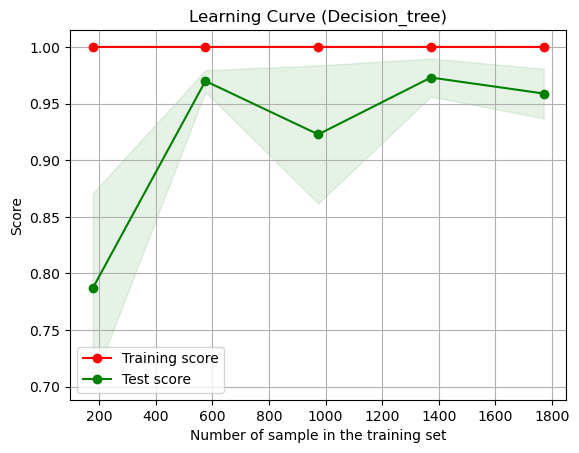

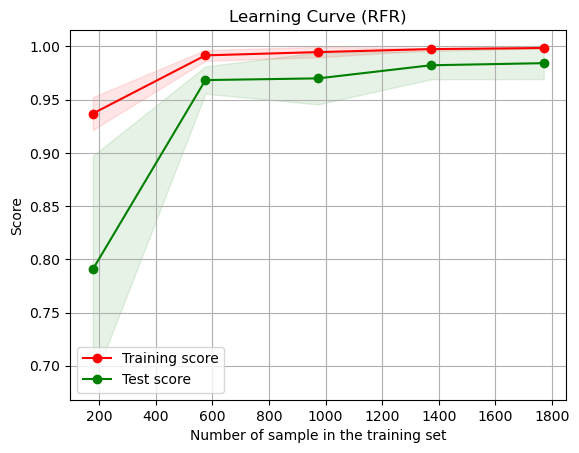

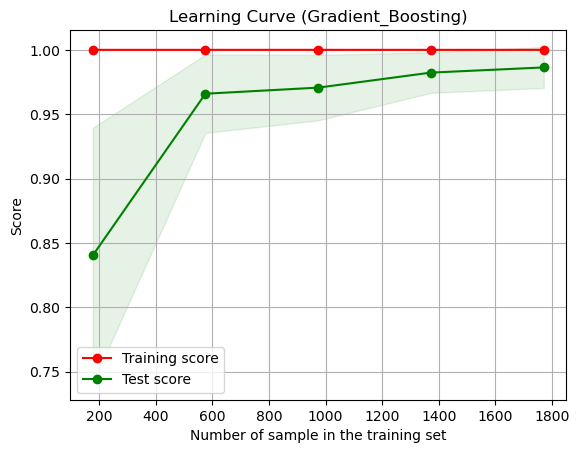

In [353]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Number of sample in the training set")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Test score")

    plt.legend(loc="best")
    return plt

# Exemple d'utilisation :
for model, name in zip(models, model_names):
    plot_learning_curve(model, f"Learning Curve ({name})", df_train_scaled, y_train, cv=5, n_jobs=-1)

plt.show()

## MLP

### Importation librairies

In [374]:
!pip install torch

  Using cached filelock-3.13.1-py3-none-any.whl.metadata (2.8 kB)
  Using cached networkx-3.2.1-py3-none-any.whl.metadata (5.2 kB)
  Using cached fsspec-2024.2.0-py3-none-any.whl.metadata (6.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 MB 12.5 MB/s eta 0:00:0000:0100:01
Using cached filelock-3.13.1-py3-none-any.whl (11 kB)
Using cached fsspec-2024.2.0-py3-none-any.whl (170 kB)
Using cached networkx-3.2.1-py3-none-any.whl (1.6 MB)
Using cached sympy-1.12-py3-none-any.whl (5.7 MB)
Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [375]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import KFold,train_test_split,GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score
from torch.nn.functional import l1_loss

In [376]:
#we change the type of some columns
data_cleaned['Année'] = data_cleaned['Année'].astype('category')
data_cleaned['Pays'] = data_cleaned['Pays'].astype('category')

/var/folders/rb/3zxqg6mj6j5dywyr7zz41drh0000gn/T/ipykernel_34066/243137158.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/rb/3zxqg6mj6j5dywyr7zz41drh0000gn/T/ipykernel_34066/243137158.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [377]:
#we extract the columns
categorical_columns = data_cleaned.select_dtypes(include='category').columns
numerical_columns = list(data_cleaned.select_dtypes(include=np.number).columns)
numerical_columns.pop(9)

'Émissions de CO2 (kt par pays)'

In [378]:

# Initialize the StandardScaler
scaler = StandardScaler()
scaler1 = StandardScaler()
# Fit and transform the data using the scaler
c = scaler1.fit_transform(data_cleaned['Émissions de CO2 (kt par pays)'].values.reshape(-1,1))
df_target_scaled = pd.DataFrame(c,columns = ['Émissions de CO2 (kt par pays)'])
df_scaled = pd.DataFrame(scaler.fit_transform(data_cleaned[numerical_columns]), columns=numerical_columns)
# Initialisation de l'encodeur OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Application de l'encodage One-Hot sur les variables catégorielles
encoded_vars = encoder.fit_transform(data_cleaned[categorical_columns])

# Création d'un DataFrame pour les variables encodées
df_encoded = pd.DataFrame(encoded_vars, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded DataFrame with the scaled numerical DataFrame
df_final = pd.concat([df_encoded, df_scaled,df_target_scaled], axis=1)

In [379]:
	
# Custom dataset class
class CustomDataset(Dataset):
    def __init__(self, data, features, target):
        self.X = data[features].values
        self.y = data[target].values
        self.len = len(data)

    def __getitem__(self, index):
        return torch.tensor(self.X[index], dtype=torch.float32), torch.tensor(self.y[index], dtype=torch.float32)

    def __len__(self):
        return self.len
#we construct our NN architecture
class RegressionNN(nn.Module):
    def __init__(self,input_size):
        super(RegressionNN,self).__init__()
        self.fc1 = nn.Linear(input_size,32)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(32,64)
        self.fc3 = nn.Linear(64,1)
    def forward(self,x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x
def cal_rmse(predictions,targets):
  mse = nn.MSELoss()
  rmse = torch.sqrt(mse(predictions,targets))
  return rmse.item()

In [380]:
# Split the data into training and testing sets
df_train, df_test = train_test_split(df_final, test_size=0.2, random_state=42)
df_train,df_val = train_test_split(df_train,test_size=0.1,random_state=42)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [381]:
target = ['Émissions de CO2 (kt par pays)']
features = df_final.columns.difference(target)
train_dataset = CustomDataset(df_train,features,target)
test_dataset = CustomDataset(df_test,features,target)
val_dataset = CustomDataset(df_val,features,target)
train_loader = DataLoader(dataset=train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=8, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=8, shuffle=False)

In [382]:
# Hyperparameters
input_size = df_final.shape[-1]-1  # Number of input features
n_epochs = 200  # Adjust the number of epochs as needed
# Set device (GPU if available, otherwise CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#instantiate the model, the optimizer and the loss function
model = RegressionNN(input_size).to(device)
loss_fn = nn.MSELoss().to(device)
optimizer = optim.SGD(model.parameters(),lr=0.001,momentum=0.9,weight_decay=0.0005)

In [383]:
val_losses = []
train_losses = []
for epoch in range(n_epochs):
    model.train()
    epoch_train_loss = 0.0
    for train_input,train_target in train_loader:
        train_input,train_target = train_input.to(device),train_target.to(device)
        train_preds = model(train_input)
        train_loss = loss_fn(train_target,train_preds)
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        epoch_train_loss += train_loss.item()
    #validation on the current val_set
    epoch_val_loss = 0.0
    model.eval()
    with torch.no_grad():
        for val_input, val_target in val_loader:
          val_input,val_target = val_input.to(device),val_target.to(device)
          val_pred = model(val_input)
          val_loss = loss_fn(val_target,val_pred)
          epoch_val_loss += val_loss.item()
    avg_train_loss = epoch_train_loss/(len(train_loader))
    avg_val_loss = epoch_val_loss/(len(val_loader))


    # Print losses for the current epoch
    print(f'Epoch{epoch+1}, Training Loss: {avg_train_loss}, Validation Loss: {avg_val_loss}')


    # Store losses for plotting
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)

Epoch1, Training Loss: 0.3983416639491177, Validation Loss: 0.010249712217565892
Epoch2, Training Loss: 0.036872322746855486, Validation Loss: 0.008435379419617155
Epoch3, Training Loss: 0.026012432781301987, Validation Loss: 0.00529038802363045
Epoch4, Training Loss: 0.02560550552450614, Validation Loss: 0.006215133727112386
Epoch5, Training Loss: 0.02728645846221491, Validation Loss: 0.0044033270013252536
Epoch6, Training Loss: 0.020600392618174496, Validation Loss: 0.00332214475825562
Epoch7, Training Loss: 0.02369722316215043, Validation Loss: 0.0034588271560746114
Epoch8, Training Loss: 0.00822936199256219, Validation Loss: 0.0027834034793029006
Epoch9, Training Loss: 0.007224711477599877, Validation Loss: 0.0025116674649845144
Epoch10, Training Loss: 0.007523293616988857, Validation Loss: 0.0019503696925572253
Epoch11, Training Loss: 0.006206266978712581, Validation Loss: 0.001853007211008974
Epoch12, Training Loss: 0.005387853424358892, Validation Loss: 0.0018898483997743046
Epo

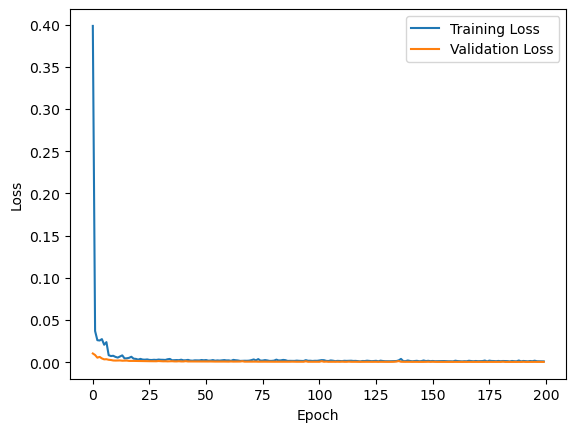

In [384]:
# Plot the training and validation losses
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [385]:
all_truth = []
all_preds = []

model.eval()
with torch.no_grad():
  for test_input, test_label in test_loader:
    test_input,test_label = test_input.to(device),test_label.to(device)
    y_pred = model(test_input)

    all_preds.extend(y_pred)
    all_truth.extend(test_label)

# Convert predictions and targets to PyTorch tensors
predictions = torch.tensor(all_preds)
targets = torch.tensor(all_truth)


In [386]:

#we inverse transform the targets and the predictions
gt_co2 = scaler1.inverse_transform(targets.numpy().reshape(-1,1))
pred_co2 = scaler1.inverse_transform(predictions.numpy().reshape(-1,1))

In [387]:

#we compute the RMSE
gt_co2 = torch.tensor(gt_co2)
pred_co2 = torch.tensor(pred_co2)
rmse = cal_rmse(gt_co2,pred_co2)
R2 = r2_score(gt_co2,pred_co2)
mae = l1_loss(gt_co2,pred_co2)
print(f'the RMSE is : {rmse},the R2 is {R2} on the test dataset and the MAE is {mae}')

the RMSE is : 27719.53515625,the R2 is 0.9984777915169432 on the test dataset and the MAE is 11473.9443359375


In [388]:
torch.save(model.state_dict(), 'model7.pth')

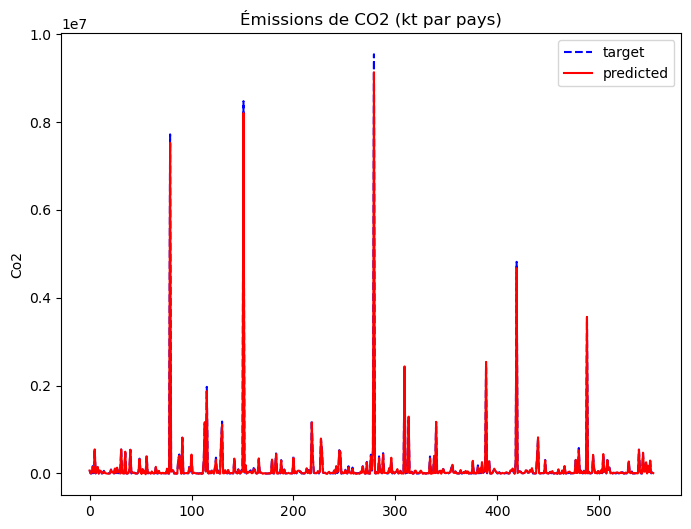

In [390]:
# Créer la figure et les axes
plt.figure(figsize=(8, 6))

# Tracer la première courbe
plt.plot(gt_co2, label='target', color='blue', linestyle='--')

# Tracer la deuxième courbe
plt.plot(pred_co2, label='predicted', color='red', linestyle='-')

# Ajouter un titre et des étiquettes d'axe
plt.title('Émissions de CO2 (kt par pays)')
#plt.xlabel('')
plt.ylabel('Co2')

# Ajouter une légende
plt.legend()
plt.savefig('plot_ml2.jpg', bbox_inches='tight')

# Afficher la figure
plt.show()

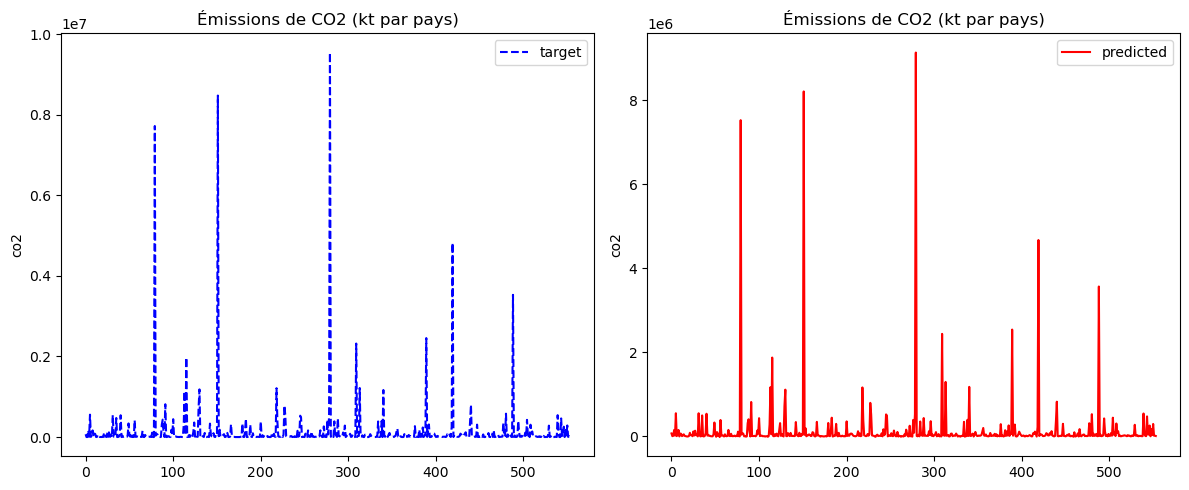

In [391]:
# Create a figure with subplots
plt.figure(figsize=(12, 5))

# Plot the first curve in the first subplot
plt.subplot(1, 2, 1)
plt.plot(gt_co2, label='target', color='blue', linestyle='--')
plt.title('Émissions de CO2 (kt par pays)')
plt.ylabel('co2')
plt.legend()

# Plot the second curve in the second subplot
plt.subplot(1, 2, 2)
plt.plot(pred_co2, label='predicted', color='red', linestyle='-')
plt.title('Émissions de CO2 (kt par pays)')
plt.ylabel('co2')
plt.legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.savefig('plot_ml3.jpg')
# Show the plot
plt.show()